In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('/home/hxcai/cell_type_specific_CRE')
from MPRA_exp.utils import *

In [2]:
# df = pd.read_csv('./data/enformer_info.csv')
# df

In [3]:
sei_info_df = pd.read_csv('./data/sei_info.csv')
sei_info_df

cell_type profile       ID  part
0             HeLa_Epithelium_Cervix   BTAF1     ID:1     0
1      H9_Embryonic_Stem_Cell_Embryo   EOMES  ID:1006     0
2      H9_Embryonic_Stem_Cell_Embryo   EP300  ID:1007     0
3      H9_Embryonic_Stem_Cell_Embryo   FOXH1  ID:1010     0
4      H9_Embryonic_Stem_Cell_Embryo   FOXH1  ID:1011     0
...                              ...     ...      ...   ...
21902                      WERI-Rb-1    CTCF   ENCODE     0
21903                      WERI-Rb-1   DNase   ENCODE     0
21904                          WI-38    CTCF   ENCODE     0
21905       WI-38 (4OHTAM_20nM_72hr)   DNase   ENCODE     0
21906                          WI-38   DNase   ENCODE     0

[21907 rows x 4 columns]

In [5]:
Gosai_designed_sei_embedding = np.load('data/Gosai_designed_sei_embedding.npy')
print(Gosai_designed_sei_embedding.shape)

Gosai_designed_sei_pred = np.load('data/Gosai_designed_sei_pred.npy')
print(Gosai_designed_sei_pred.shape)

(76168, 15360)
(76168, 21907)


In [6]:
true_df = pd.read_csv('/home/hxcai/cell_type_specific_CRE/data/GosaiMPRA/GosaiMPRA_designed.csv', sep='\t')

In [7]:
true_df

seq      K562     HepG2  \
0      TCGAAACAGGTATACCGCCAGCAATCCAATCTCTACCGGTGTACAC... -0.311911  2.196081   
1      GCTAAGGTCCTTATTGAATTTTGGTTAATCATTAACTACCCGTCAT... -1.110302  0.880661   
2      TGGTCCATTCCTGGGAATTTGCCGCCTGTACCTGCAAGGTTATACA... -0.545083  2.169025   
3      TCGGGAGATGTCAACACCTGTTGAGCTATTATGCCCTAGCCTGGTT... -0.769610  2.042634   
4      GACTTTGAACTCTGGACAGCAGAACAAATCACGGGAACCCTGTCAT... -0.654328  2.037279   
...                                                  ...       ...       ...   
76163  CTCGGAGTTCAAGAAAATCATCTCACACGGCCGTCTCAGACCCTTC... -0.315267  0.591628   
76164  GCAATCCTACCCAGACAGATGCAGACAGCGACCTGGTGGGGGATGT... -0.134821 -0.359782   
76165  CCTATGCTGCCTCCTATGCCCTTGTCATCATTGCCATTTTTGAGCT...  0.646673  0.489900   
76166  AGCCACAACAAAACAGCCAGTTAATGTGGAAACAAGGTCGACAACT... -0.061676 -0.014411   
76167  GACCTCCAGGCATACGAGGACCCTGCACAGGGAGCCTTGGACTTTA...  0.107924  0.306959   

          SKNSH  HepG2_b  K562_b  SKNSH_b  
0     -0.917639        1       0        0  
1     -1.097117        0       0        0  
2     -1.135171        1       0        0  
3     -0.703300        1       0        0  
4     -1.243780        1       0        0  
...         ...      ...     ...      ...  
76163  0.068697        0       0        0  
76164 -0.022281        0       0        0  
76165  0.462366        0       0        0  
76166  0.239693        0       0        0  
76167 -0.092440        0       0        0  

[76168 rows x 7 columns]

In [21]:
def find_index(df, cell_type='', profile=''):
    df = df.replace('-', '', regex=True)
    index = df[(df['cell_type'].str.contains(cell_type, case=False)) & (df['profile'].str.contains(profile, case=False))].index
    return index

# def find_index(df, cell_type_list=None, profile_list=None):
#     if cell_type_list is None:
#         cell_type_list = []
#     if profile_list is None:
#         profile_list = []

#     cell_type_condition = df['cell_type'].str.contains('|'.join(cell_type_list), case=False) if cell_type_list else True
#     profile_condition = df['profile'].str.contains('|'.join(profile_list), case=False) if profile_list else True
#     return df[cell_type_condition & profile_condition].index


def process(cell_type, profile):
    filtered_index = find_index(sei_info_df, cell_type, profile)

    if len(filtered_index) == 0:
        print(f'No {cell_type} {profile} data found.')
        return
    else:
        print(f'{len(filtered_index)} {cell_type} {profile} data found.')

    print(sei_info_df.iloc[filtered_index])
    for i in filtered_index:
        print(f'pearson r between true and {i} = {pearsonr(true_df[cell_type], Gosai_designed_sei_pred[:, i])}')
    # for i in filtered_index:
    #     print(f'pearson r between encode and {i} = {pearsonr(Gosai_designed_sei_pred[:, i], Gosai_designed_sei_pred[:, i])}')

    true_df[f'{cell_type}_{profile}_cts_pred'] = Gosai_designed_sei_pred[:, filtered_index].mean(axis=1)


def plot(cell_type, profile):
    r = pearsonr(true_df[f'{cell_type}_{profile}_cts_pred'], true_df[cell_type])[0]
    print(f'pearson r = {r:.3f}')

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=true_df[f'{cell_type}_{profile}_cts_pred'], y=true_df[cell_type], s=1, edgecolor=None)
    plt.ylabel(f'{cell_type}_MPRA_true')
    plt.text(x=0.1, y=0.9, s=f'pearson r = {r:.3f}', transform=plt.gca().transAxes, fontsize=16)
    plt.savefig(f'figures/{cell_type}_{profile}_cts_pred.png', dpi=300, bbox_inches='tight')

9 HepG2 Dnase data found.
                            cell_type profile        ID  part
984            HepG2_Epithelium_Liver   DNase  ID:33596     0
990            HepG2_Epithelium_Liver   DNase  ID:33603     0
998            HepG2_Epithelium_Liver   DNase  ID:33612     0
2921           HepG2_Epithelium_Liver   DNase  ID:40606     0
3013           HepG2_Epithelium_Liver   DNase  ID:40772     0
4574           HepG2_Epithelium_Liver   DNase  ID:44961     0
4575           HepG2_Epithelium_Liver   DNase  ID:44962     0
20977                           HepG2   DNase    ENCODE     0
20988  HepG2_Hepatocellular_Carcinoma   DNase   Roadmap     0
pearson r between true and 984 = PearsonRResult(statistic=0.5155517152273994, pvalue=0.0)
pearson r between true and 990 = PearsonRResult(statistic=0.3592202326356486, pvalue=0.0)
pearson r between true and 998 = PearsonRResult(statistic=0.4869545507157667, pvalue=0.0)
pearson r between true and 2921 = PearsonRResult(statistic=0.605994408675887, pvalue

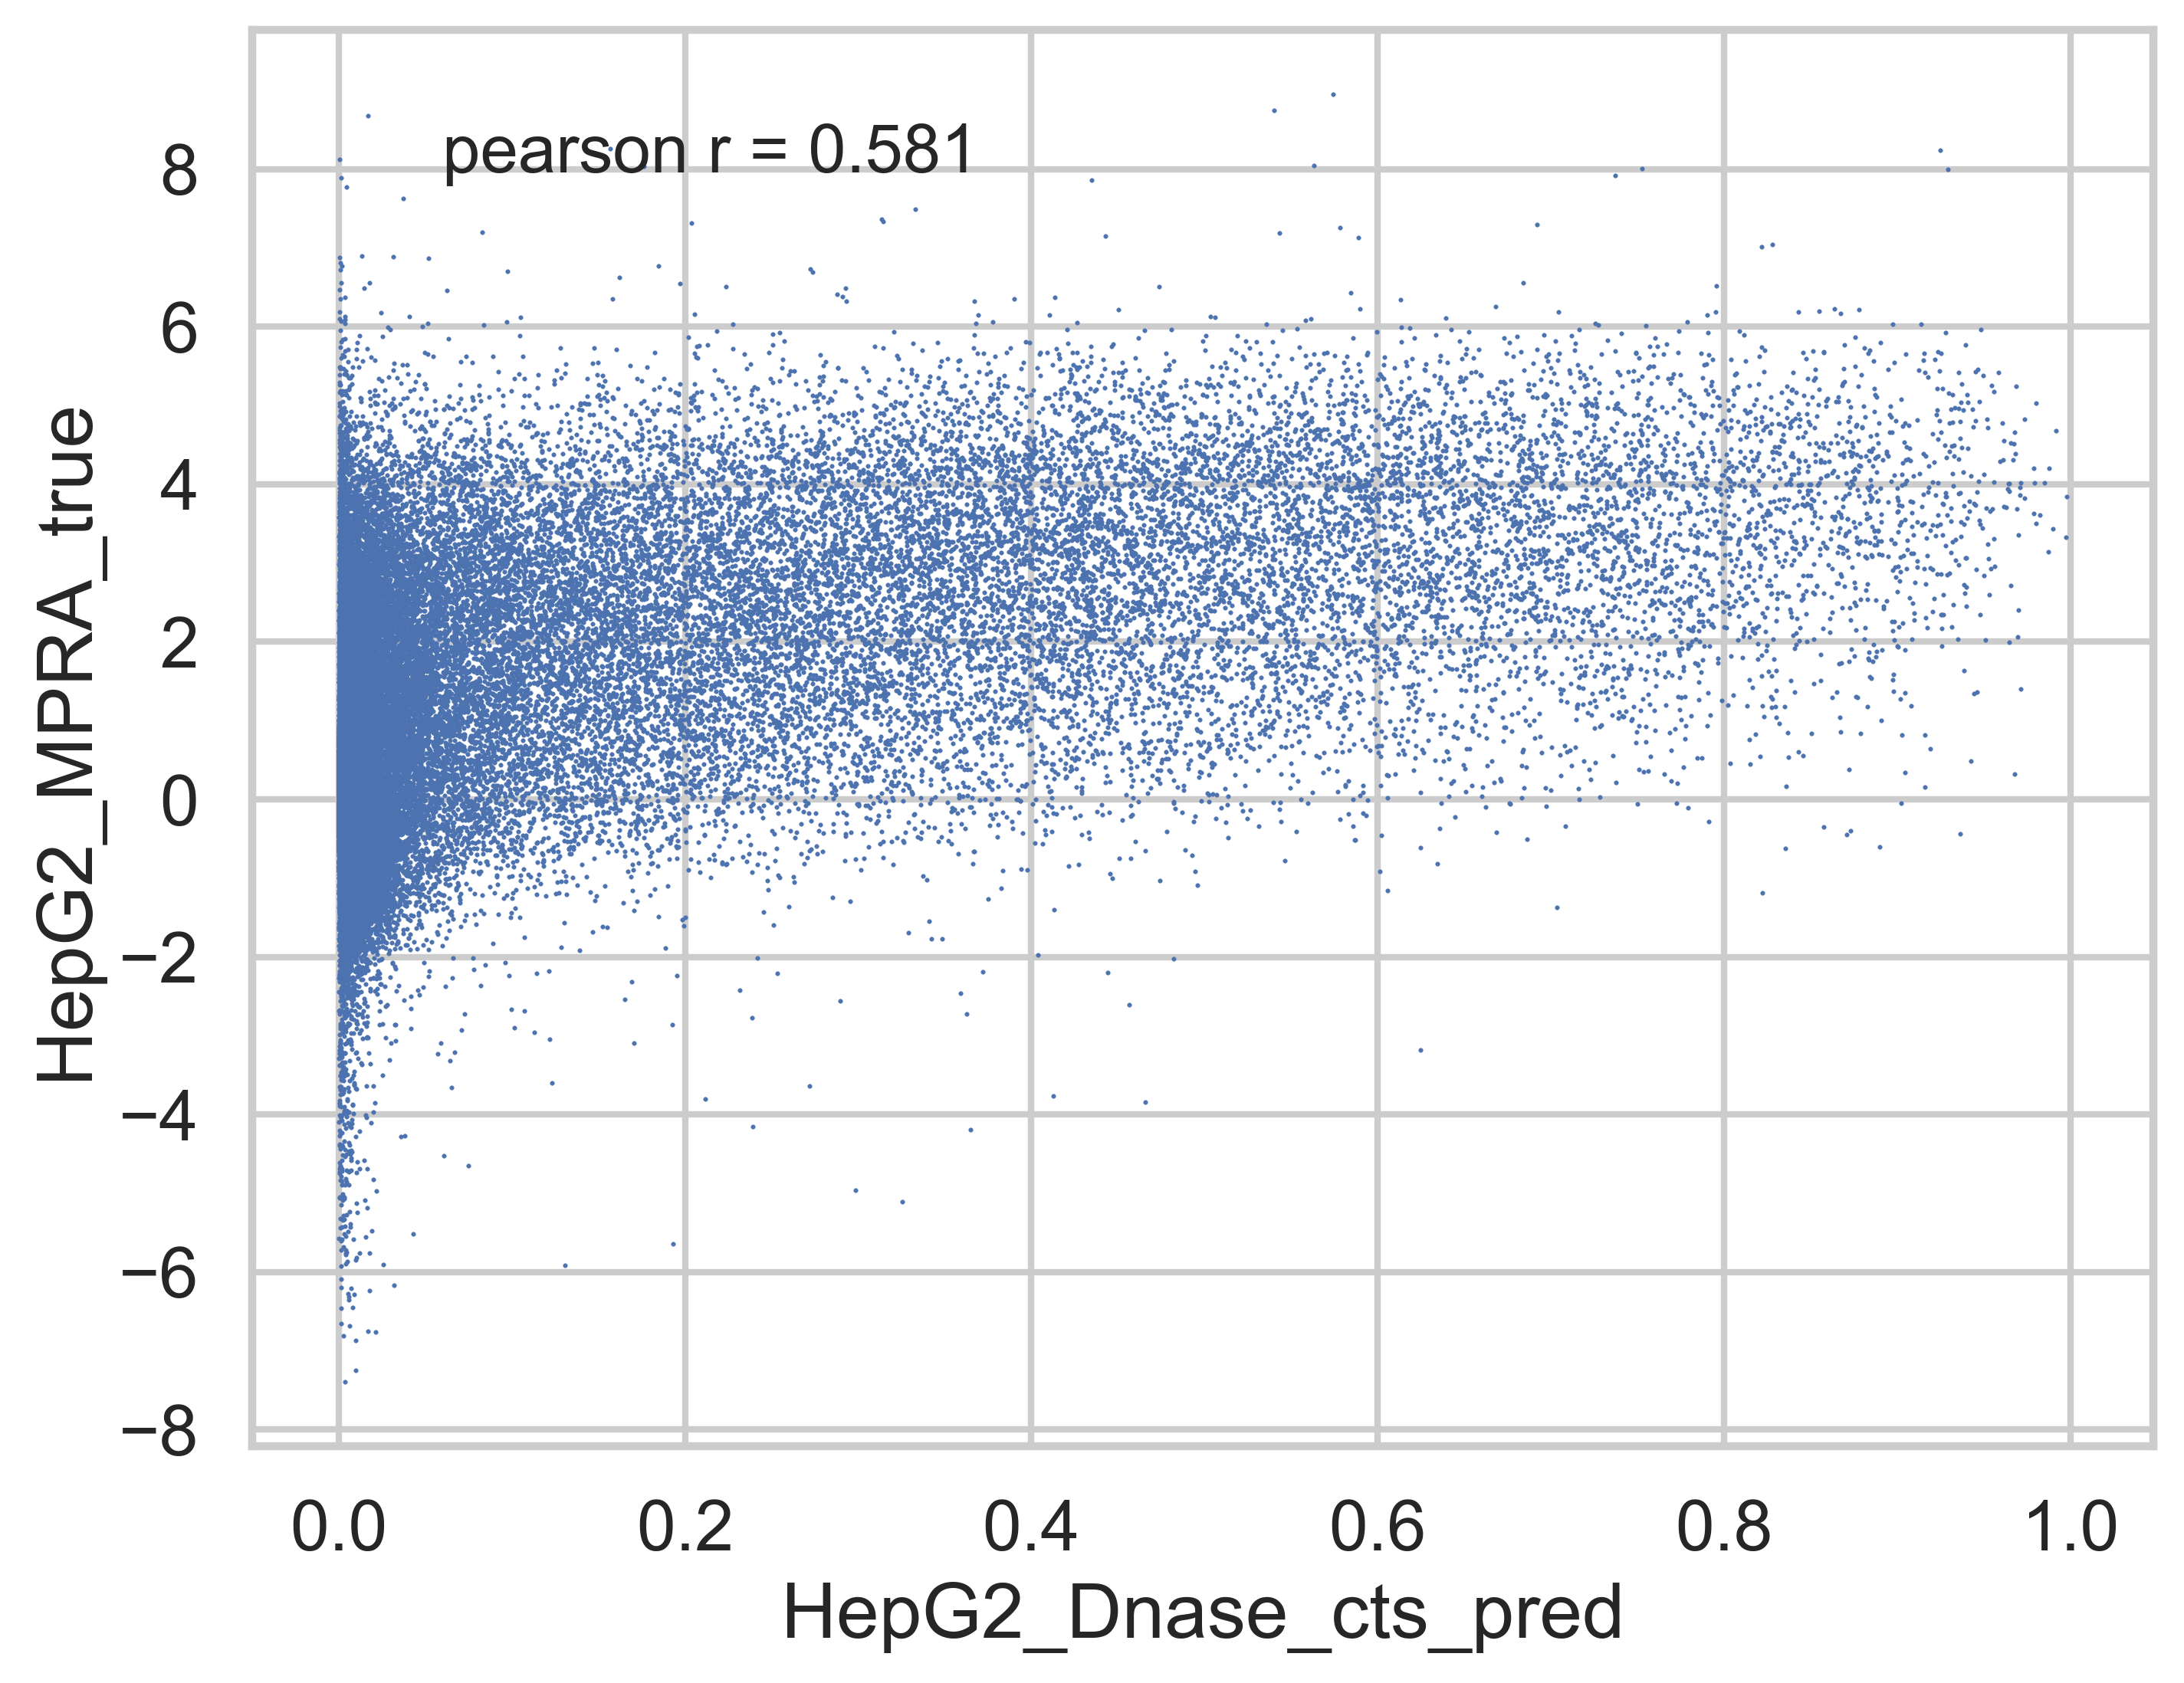

In [22]:
process('HepG2', 'Dnase')
plot('HepG2', 'Dnase')

58 K562 Dnase data found.
                           cell_type profile        ID  part
1490   K562_Erythroblast_Bone_Marrow   DNase  ID:35743     0
2919   K562_Erythroblast_Bone_Marrow   DNase  ID:40604     0
3167   K562_Erythroblast_Bone_Marrow   DNase  ID:40988     0
4632   K562_Erythroblast_Bone_Marrow   DNase  ID:45020     0
4633   K562_Erythroblast_Bone_Marrow   DNase  ID:45021     0
10715  K562_Erythroblast_Bone_Marrow   DNase  ID:62454     0
10716  K562_Erythroblast_Bone_Marrow   DNase  ID:62455     0
10717  K562_Erythroblast_Bone_Marrow   DNase  ID:62456     0
10718  K562_Erythroblast_Bone_Marrow   DNase  ID:62457     0
10719  K562_Erythroblast_Bone_Marrow   DNase  ID:62458     0
10720  K562_Erythroblast_Bone_Marrow   DNase  ID:62459     0
10721  K562_Erythroblast_Bone_Marrow   DNase  ID:62460     0
10722  K562_Erythroblast_Bone_Marrow   DNase  ID:62461     0
10723  K562_Erythroblast_Bone_Marrow   DNase  ID:62462     0
10724  K562_Erythroblast_Bone_Marrow   DNase  ID:62463     

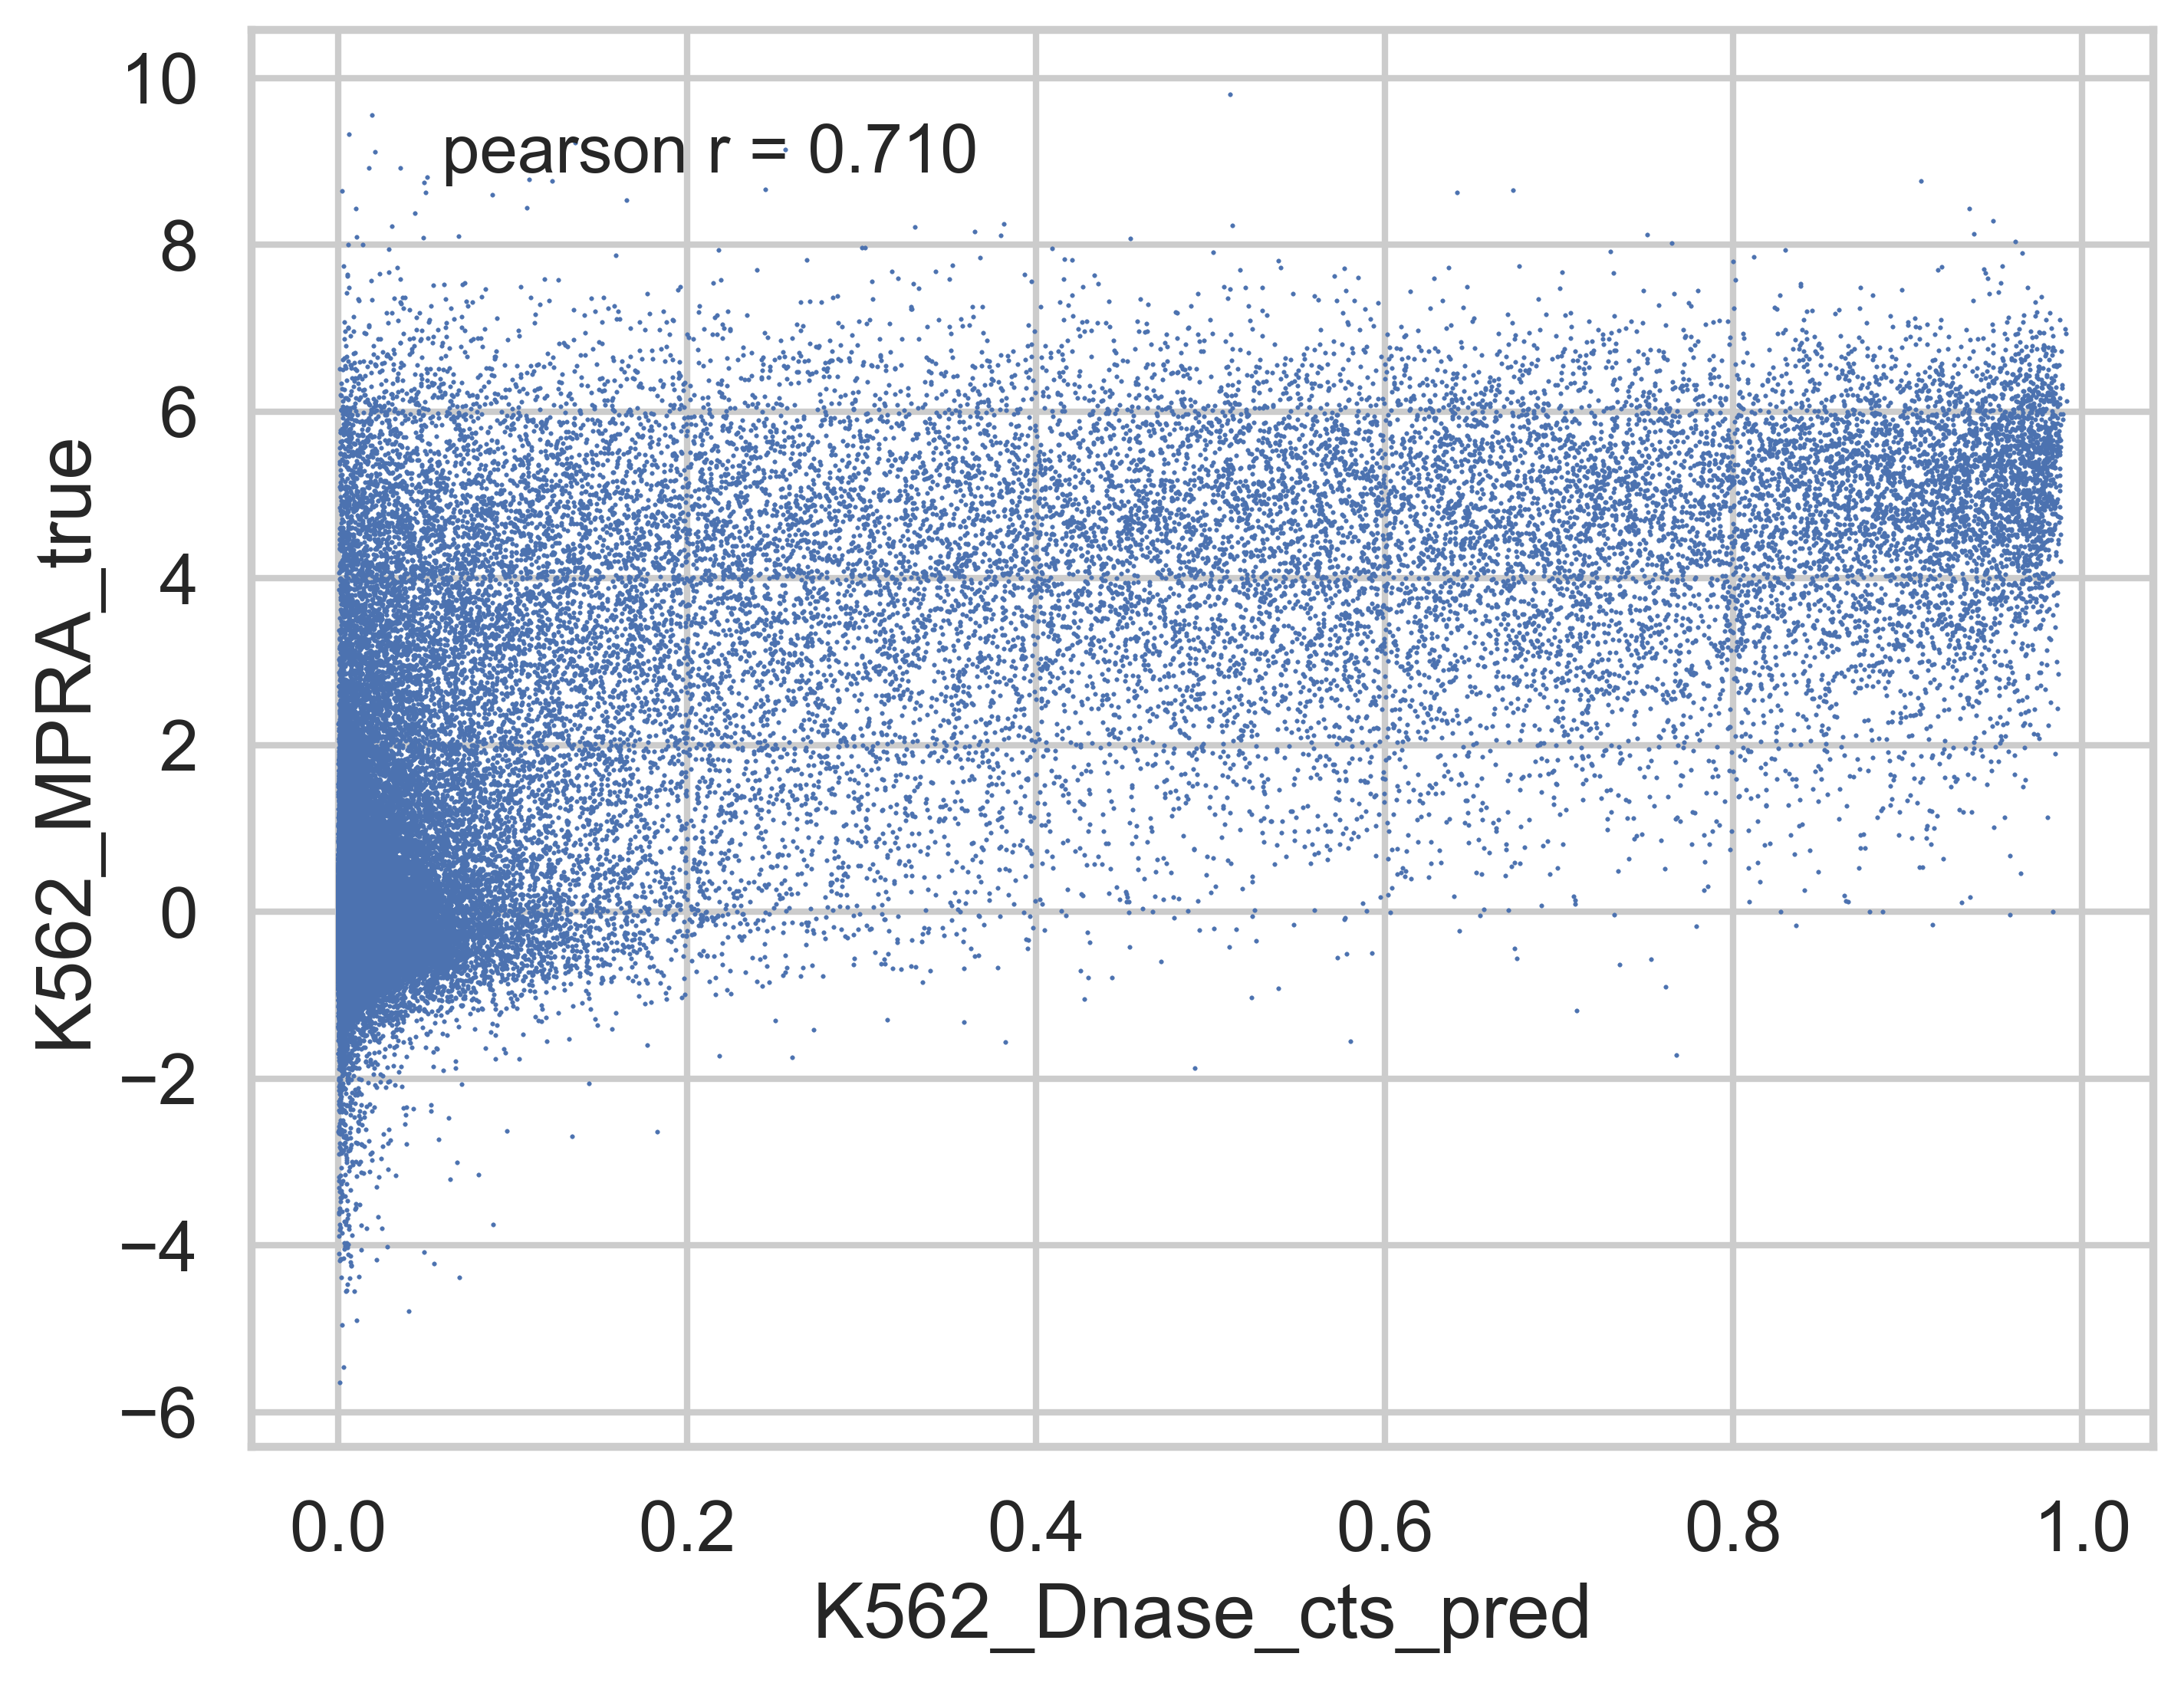

In [23]:
process('K562', 'Dnase')
plot('K562', 'Dnase')

<Axes: xlabel='SKNSH', ylabel='Count'>

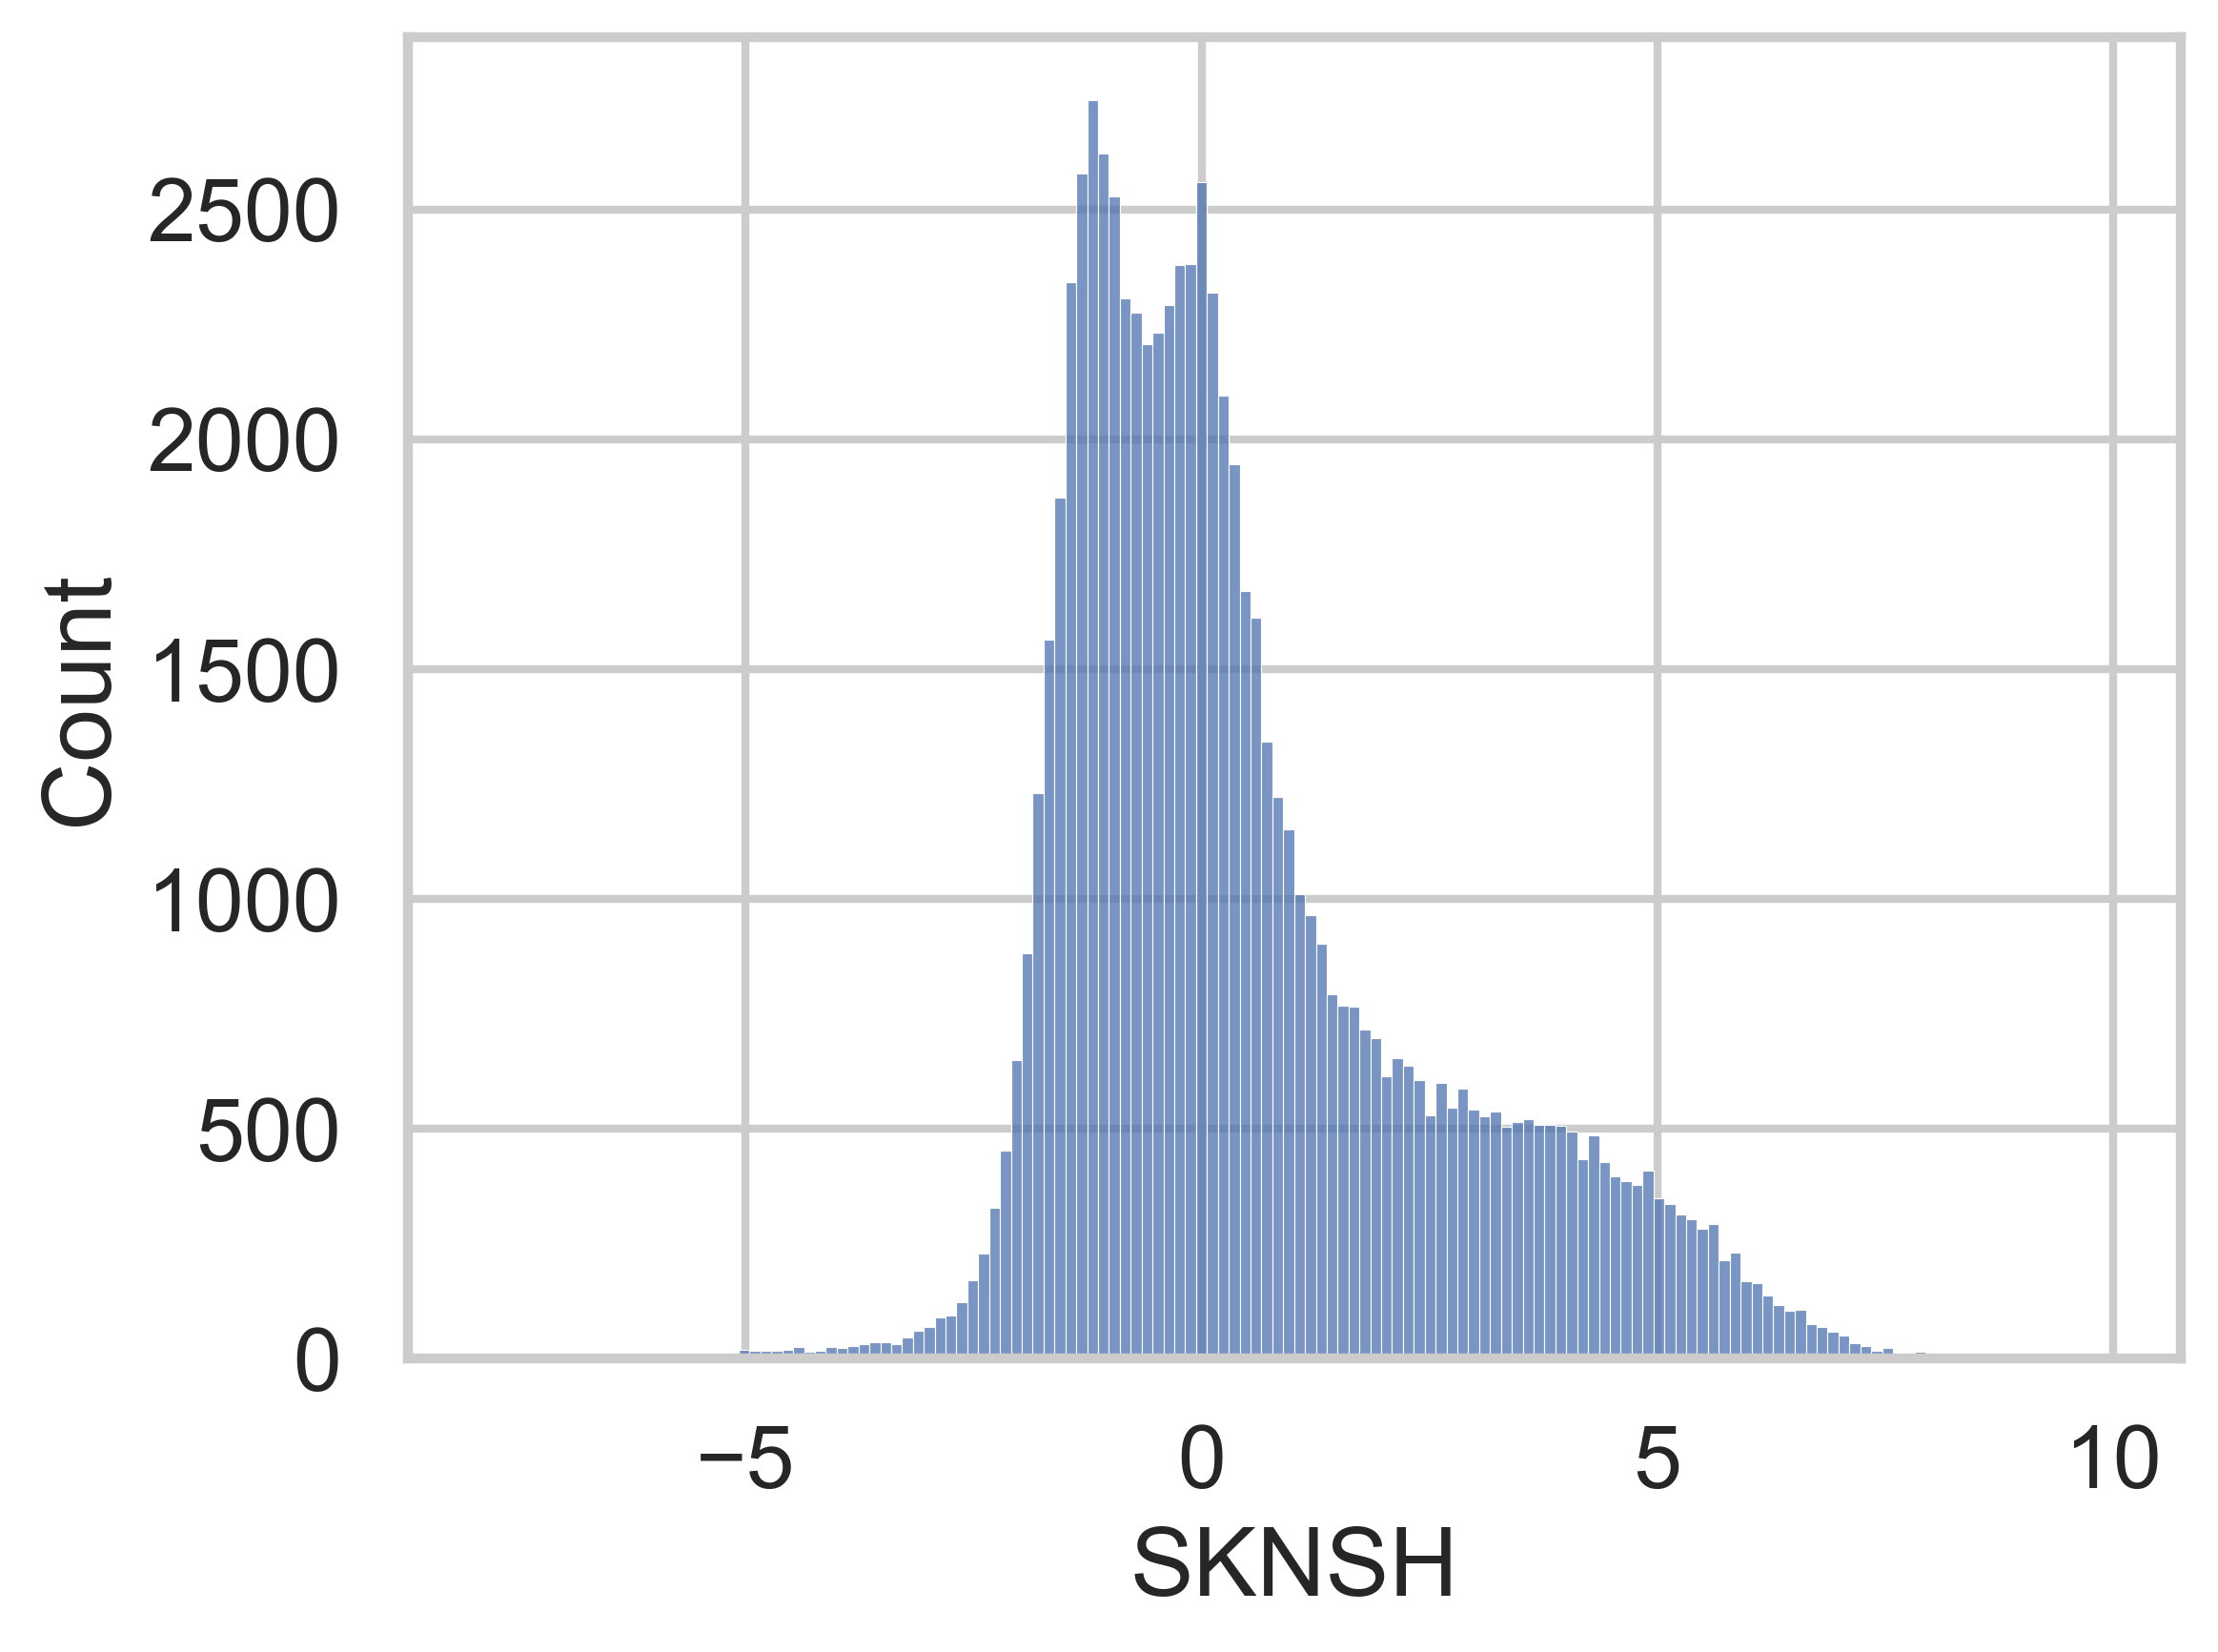

In [25]:
sns.histplot(true_df['SKNSH'])

4 SKNSH Dnase data found.
                     cell_type profile        ID  part
2916   SK-N-SH_RA_Neuron_Brain   DNase  ID:40601     0
4679   SK-N-SH_RA_Neuron_Brain   DNase  ID:45067     0
4680   SK-N-SH_RA_Neuron_Brain   DNase  ID:45068     0
21842               SK-N-SH_RA   DNase    ENCODE     0
pearson r between true and 2916 = PearsonRResult(statistic=-0.1563261042653588, pvalue=0.0)
pearson r between true and 4679 = PearsonRResult(statistic=-0.12515199834513155, pvalue=1.813834605341827e-263)
pearson r between true and 4680 = PearsonRResult(statistic=-0.16894613290258256, pvalue=0.0)
pearson r between true and 21842 = PearsonRResult(statistic=-0.19479561376739613, pvalue=0.0)
pearson r = -0.165


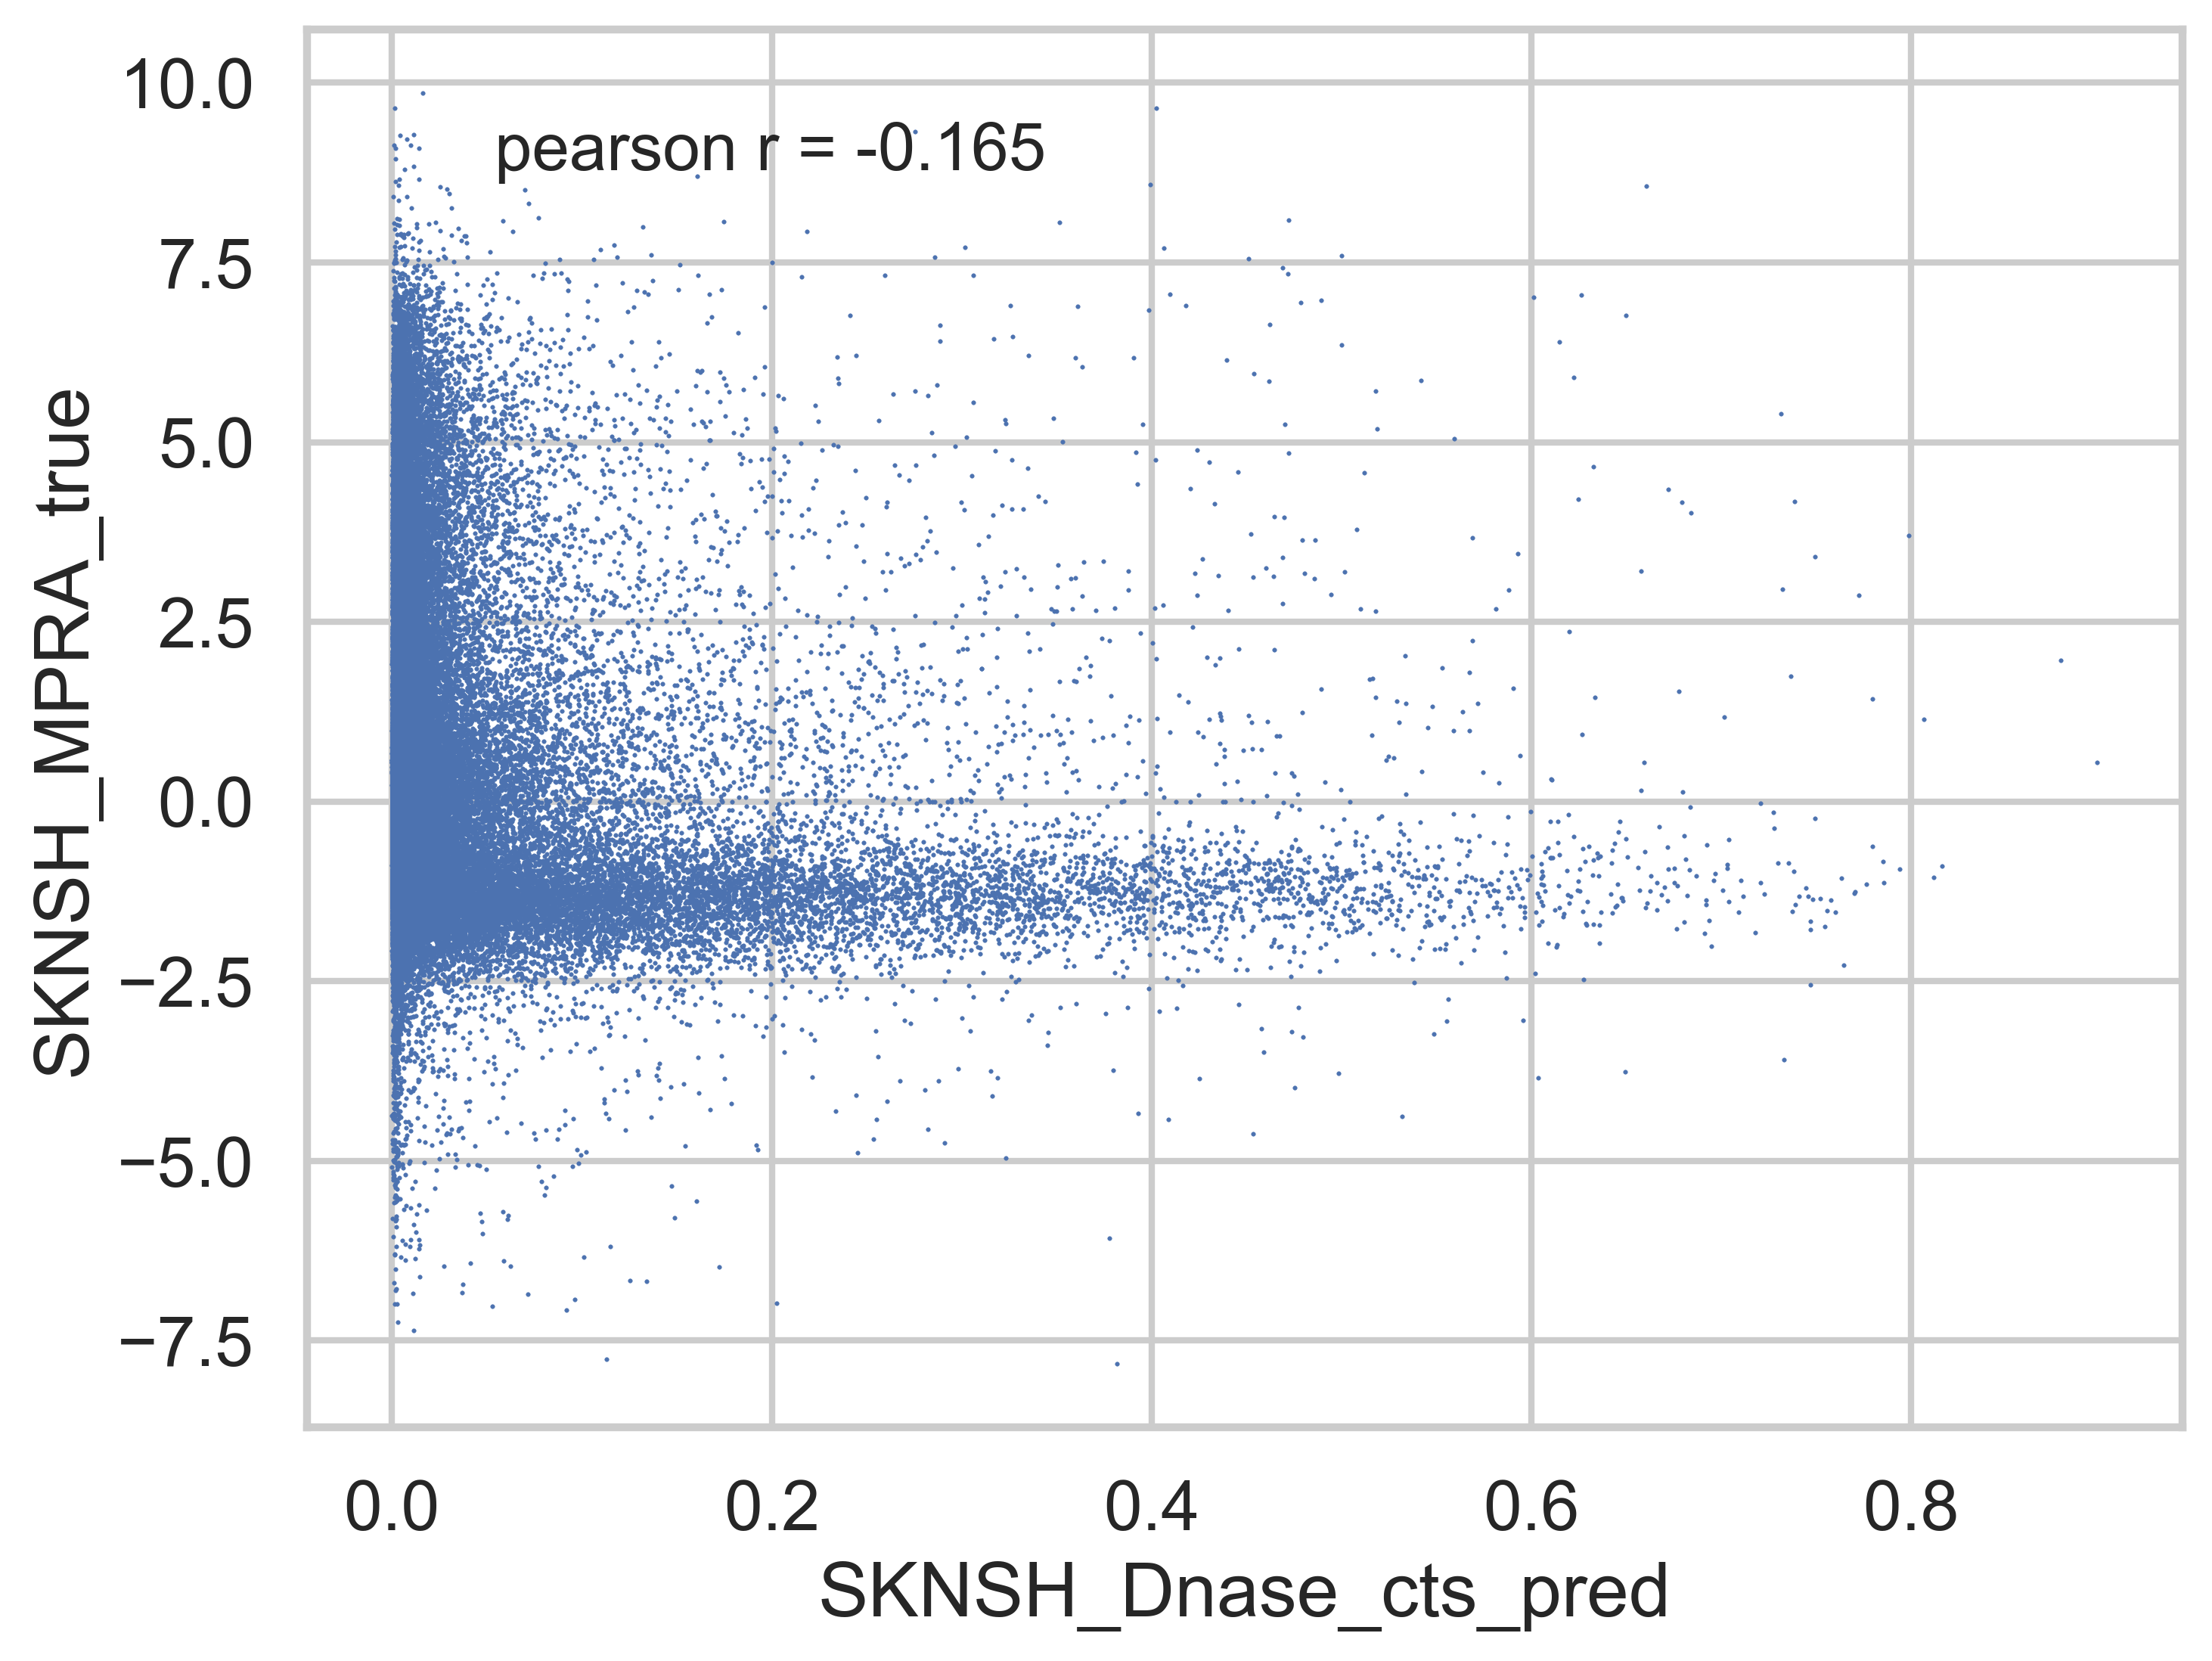

In [24]:
process('SKNSH', 'Dnase')
plot('SKNSH', 'Dnase')

In [14]:
def plot_logit(true_df, cell_type, profile):
    x = true_df[f'{cell_type}_{profile}_cts_pred']
    x = np.log(x/(1-x))
    y = true_df[cell_type]
    r = pearsonr(x, y)[0]
    print(f'pearson r = {r:.3f}')

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x, y=y, s=1, edgecolor=None)
    plt.xlabel(f'{cell_type}_{profile}_pred_logit')
    plt.ylabel(f'{cell_type}_MPRA_true')
    plt.text(x=0.1, y=0.9, s=f'pearson r = {r:.3f}', transform=plt.gca().transAxes, fontsize=16)
    plt.savefig(f'figures/{cell_type}_{profile}_pred_logit.png', dpi=300, bbox_inches='tight')

In [18]:
plot_logit(true_df, 'SKNSH', 'ATAC')

KeyError: 'SKNSH_ATAC_cts_pred'

pearson r = -0.125


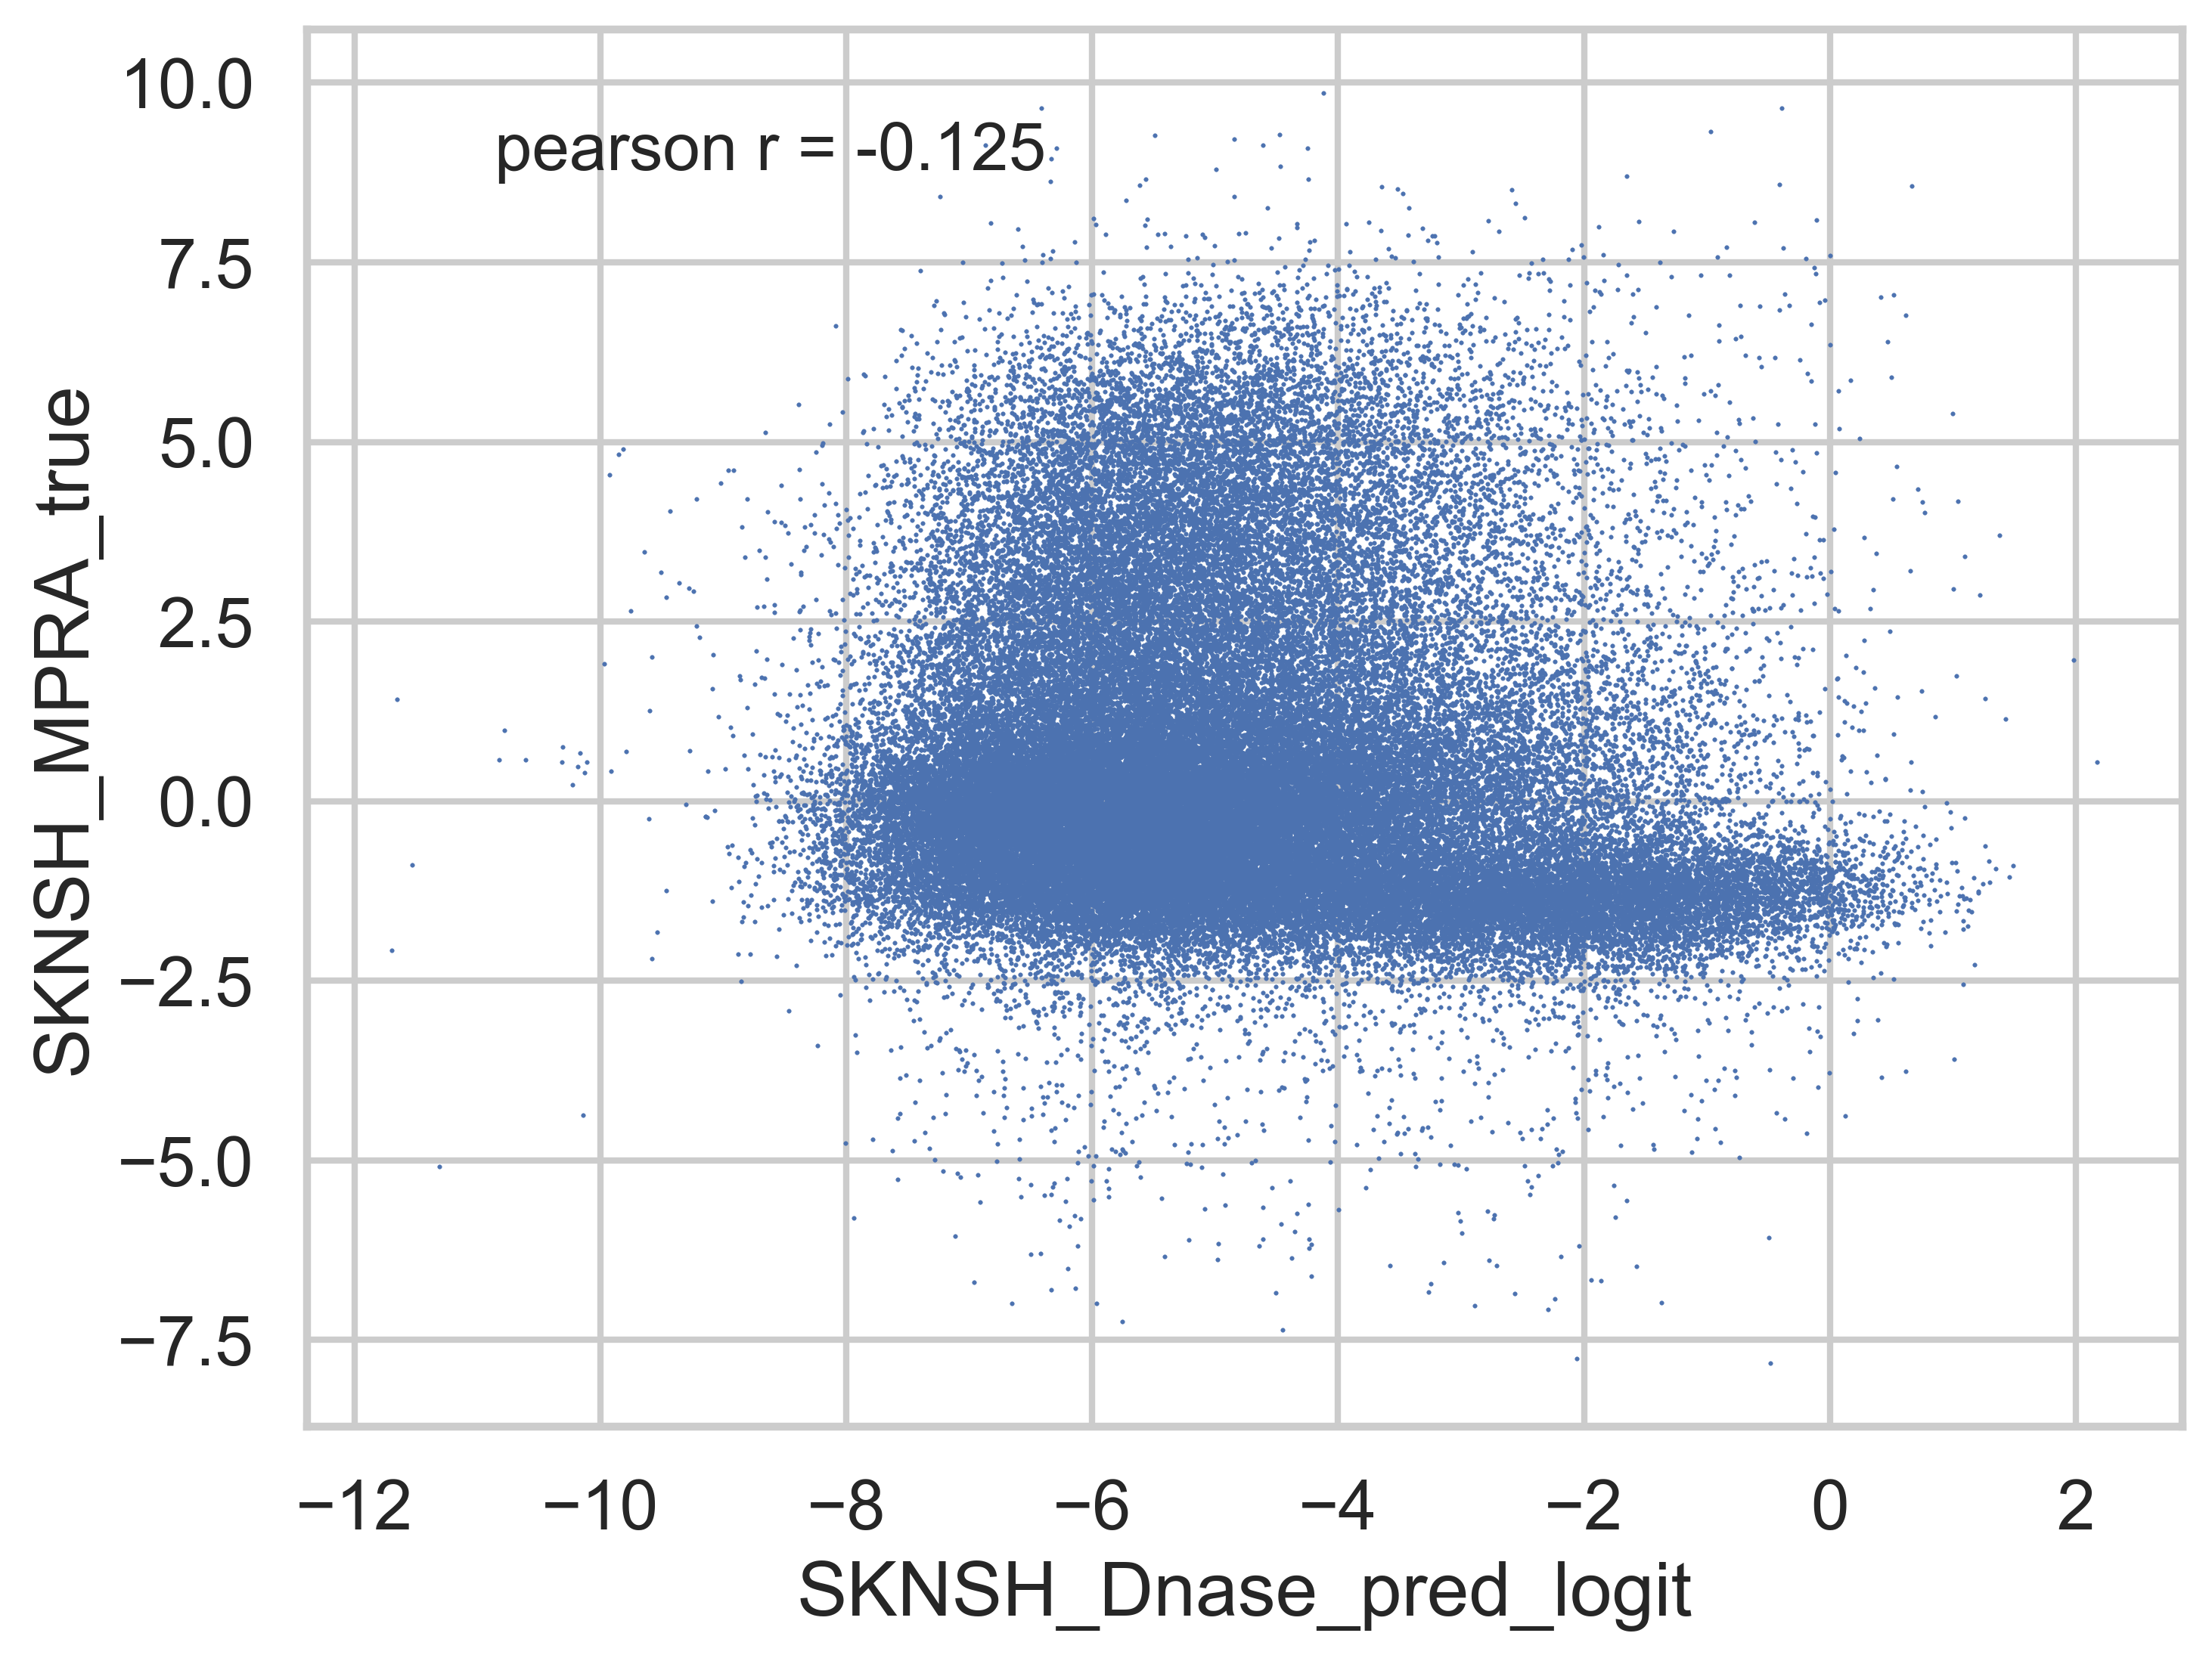

In [15]:
plot_logit(true_df, 'SKNSH', 'Dnase')

pearson r = 0.610


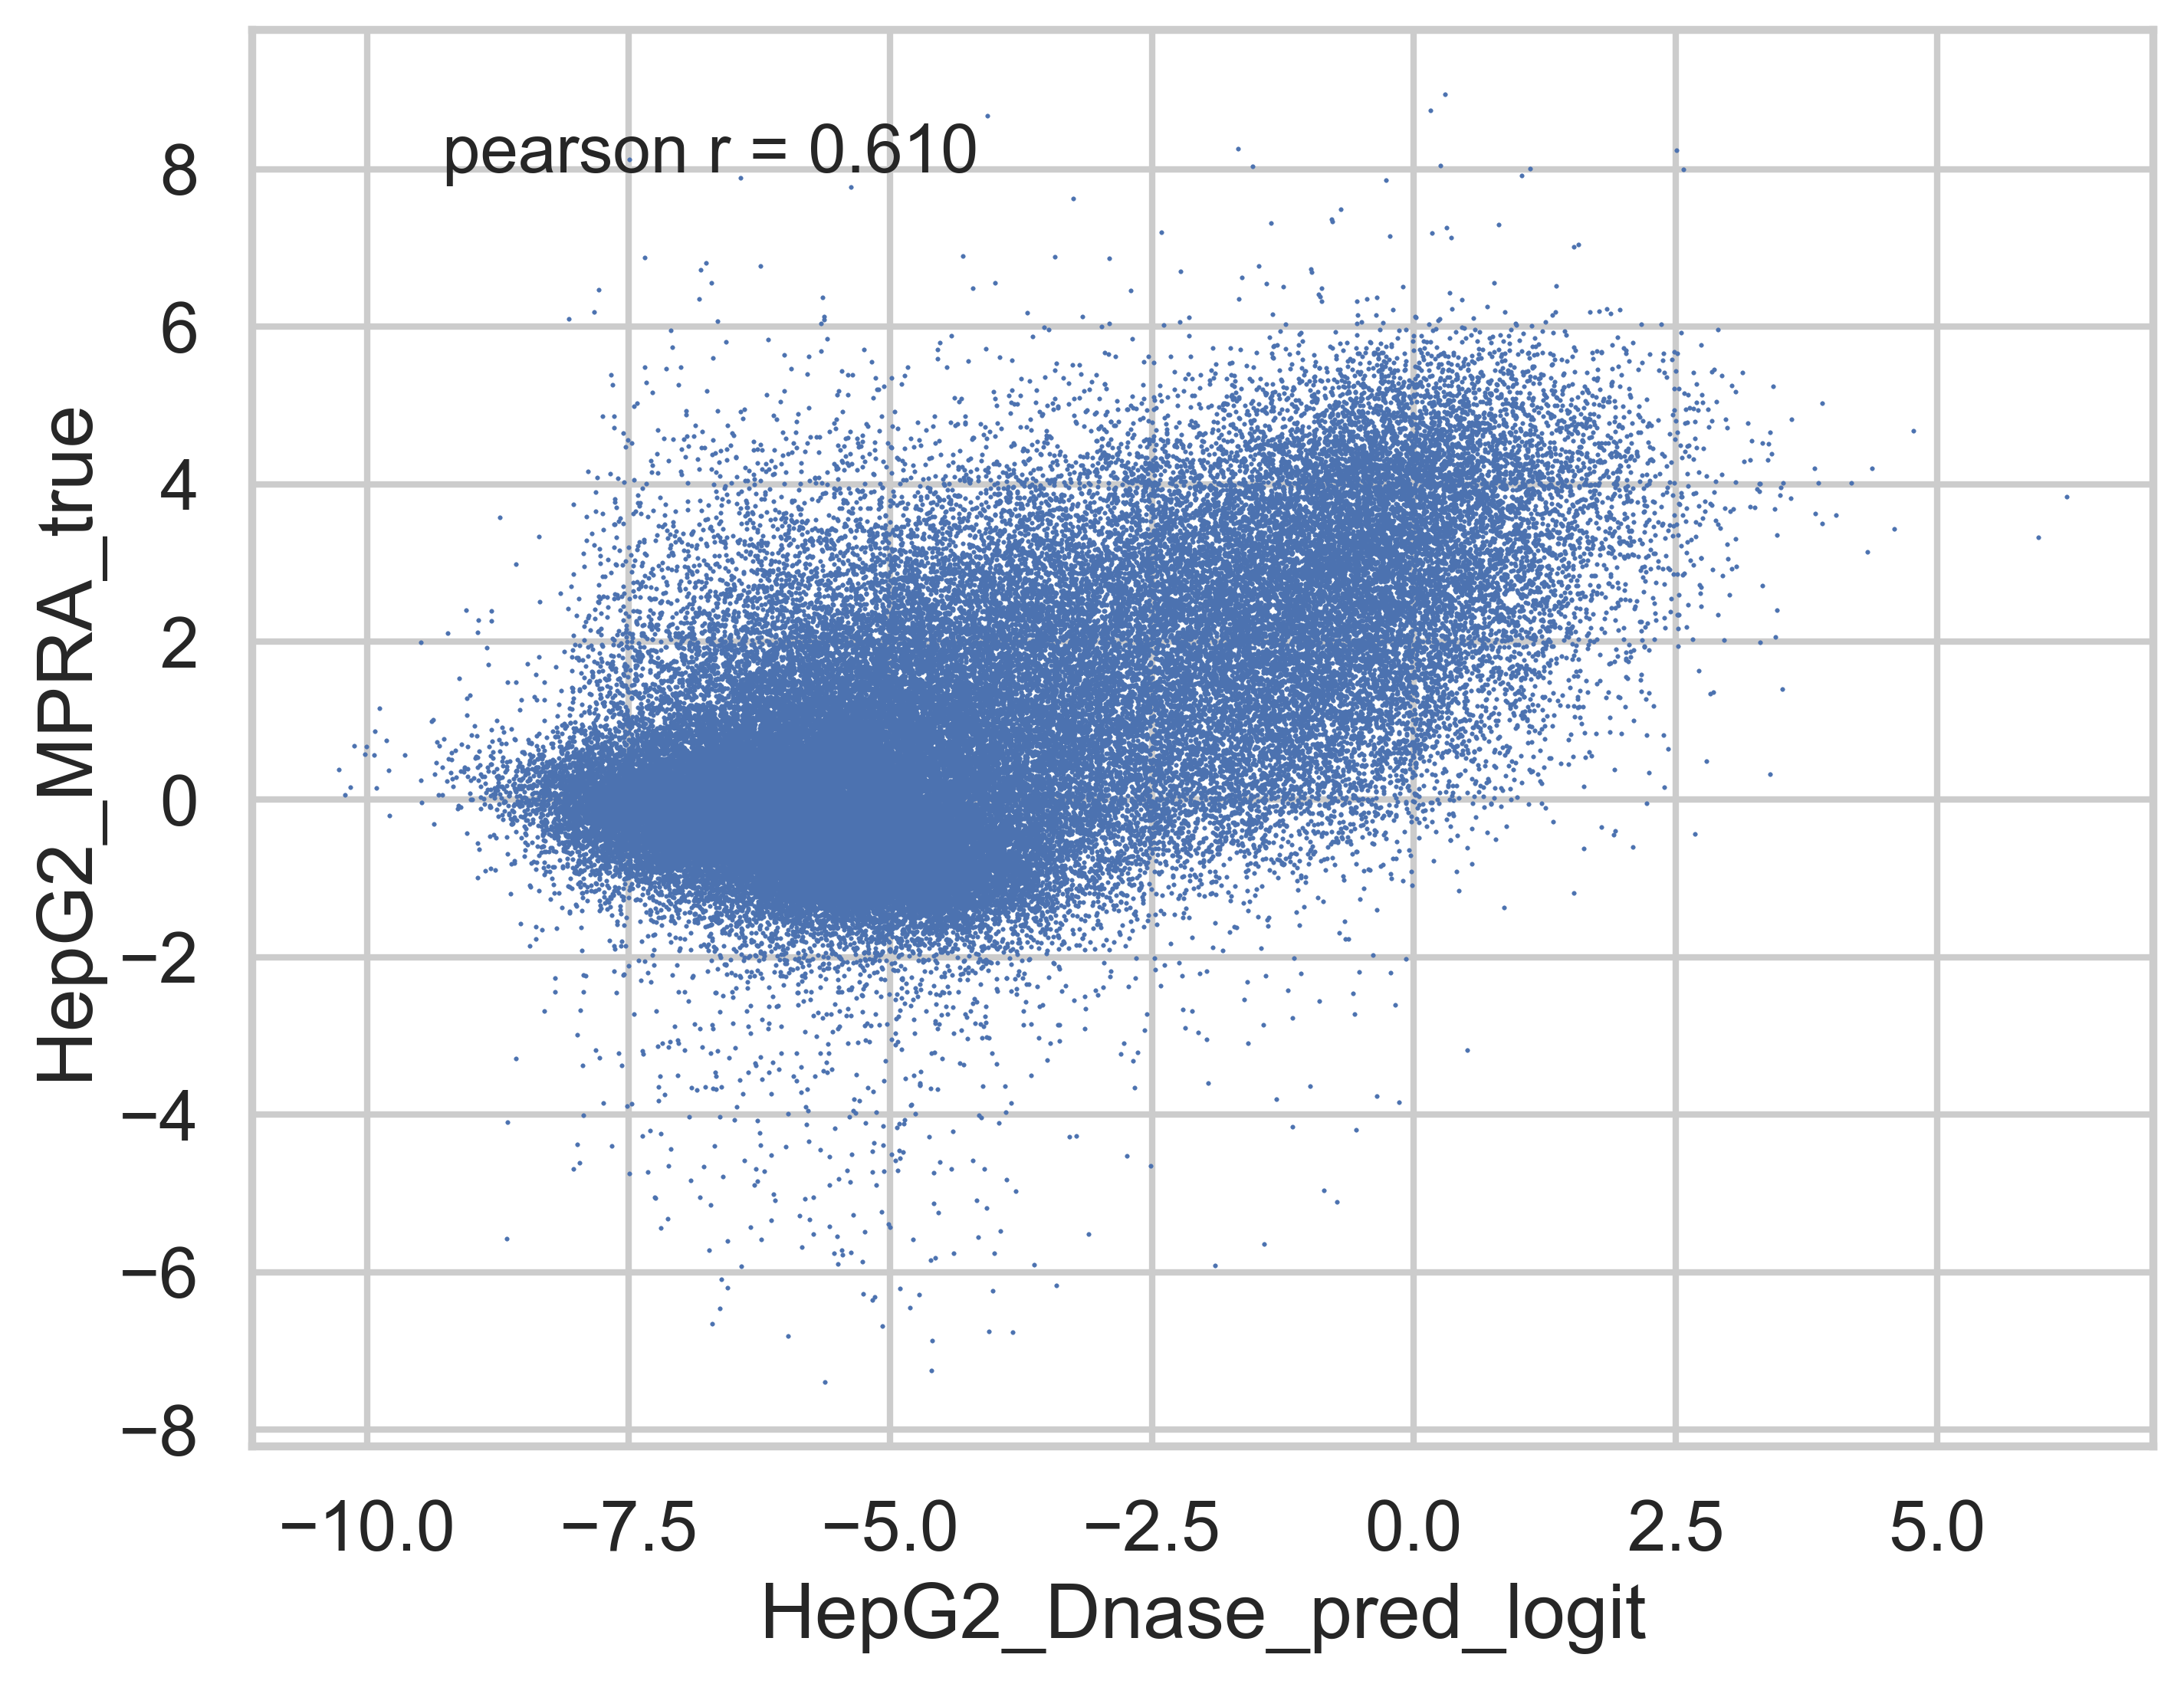

In [16]:
plot_logit(true_df, 'HepG2', 'Dnase')

pearson r = 0.734


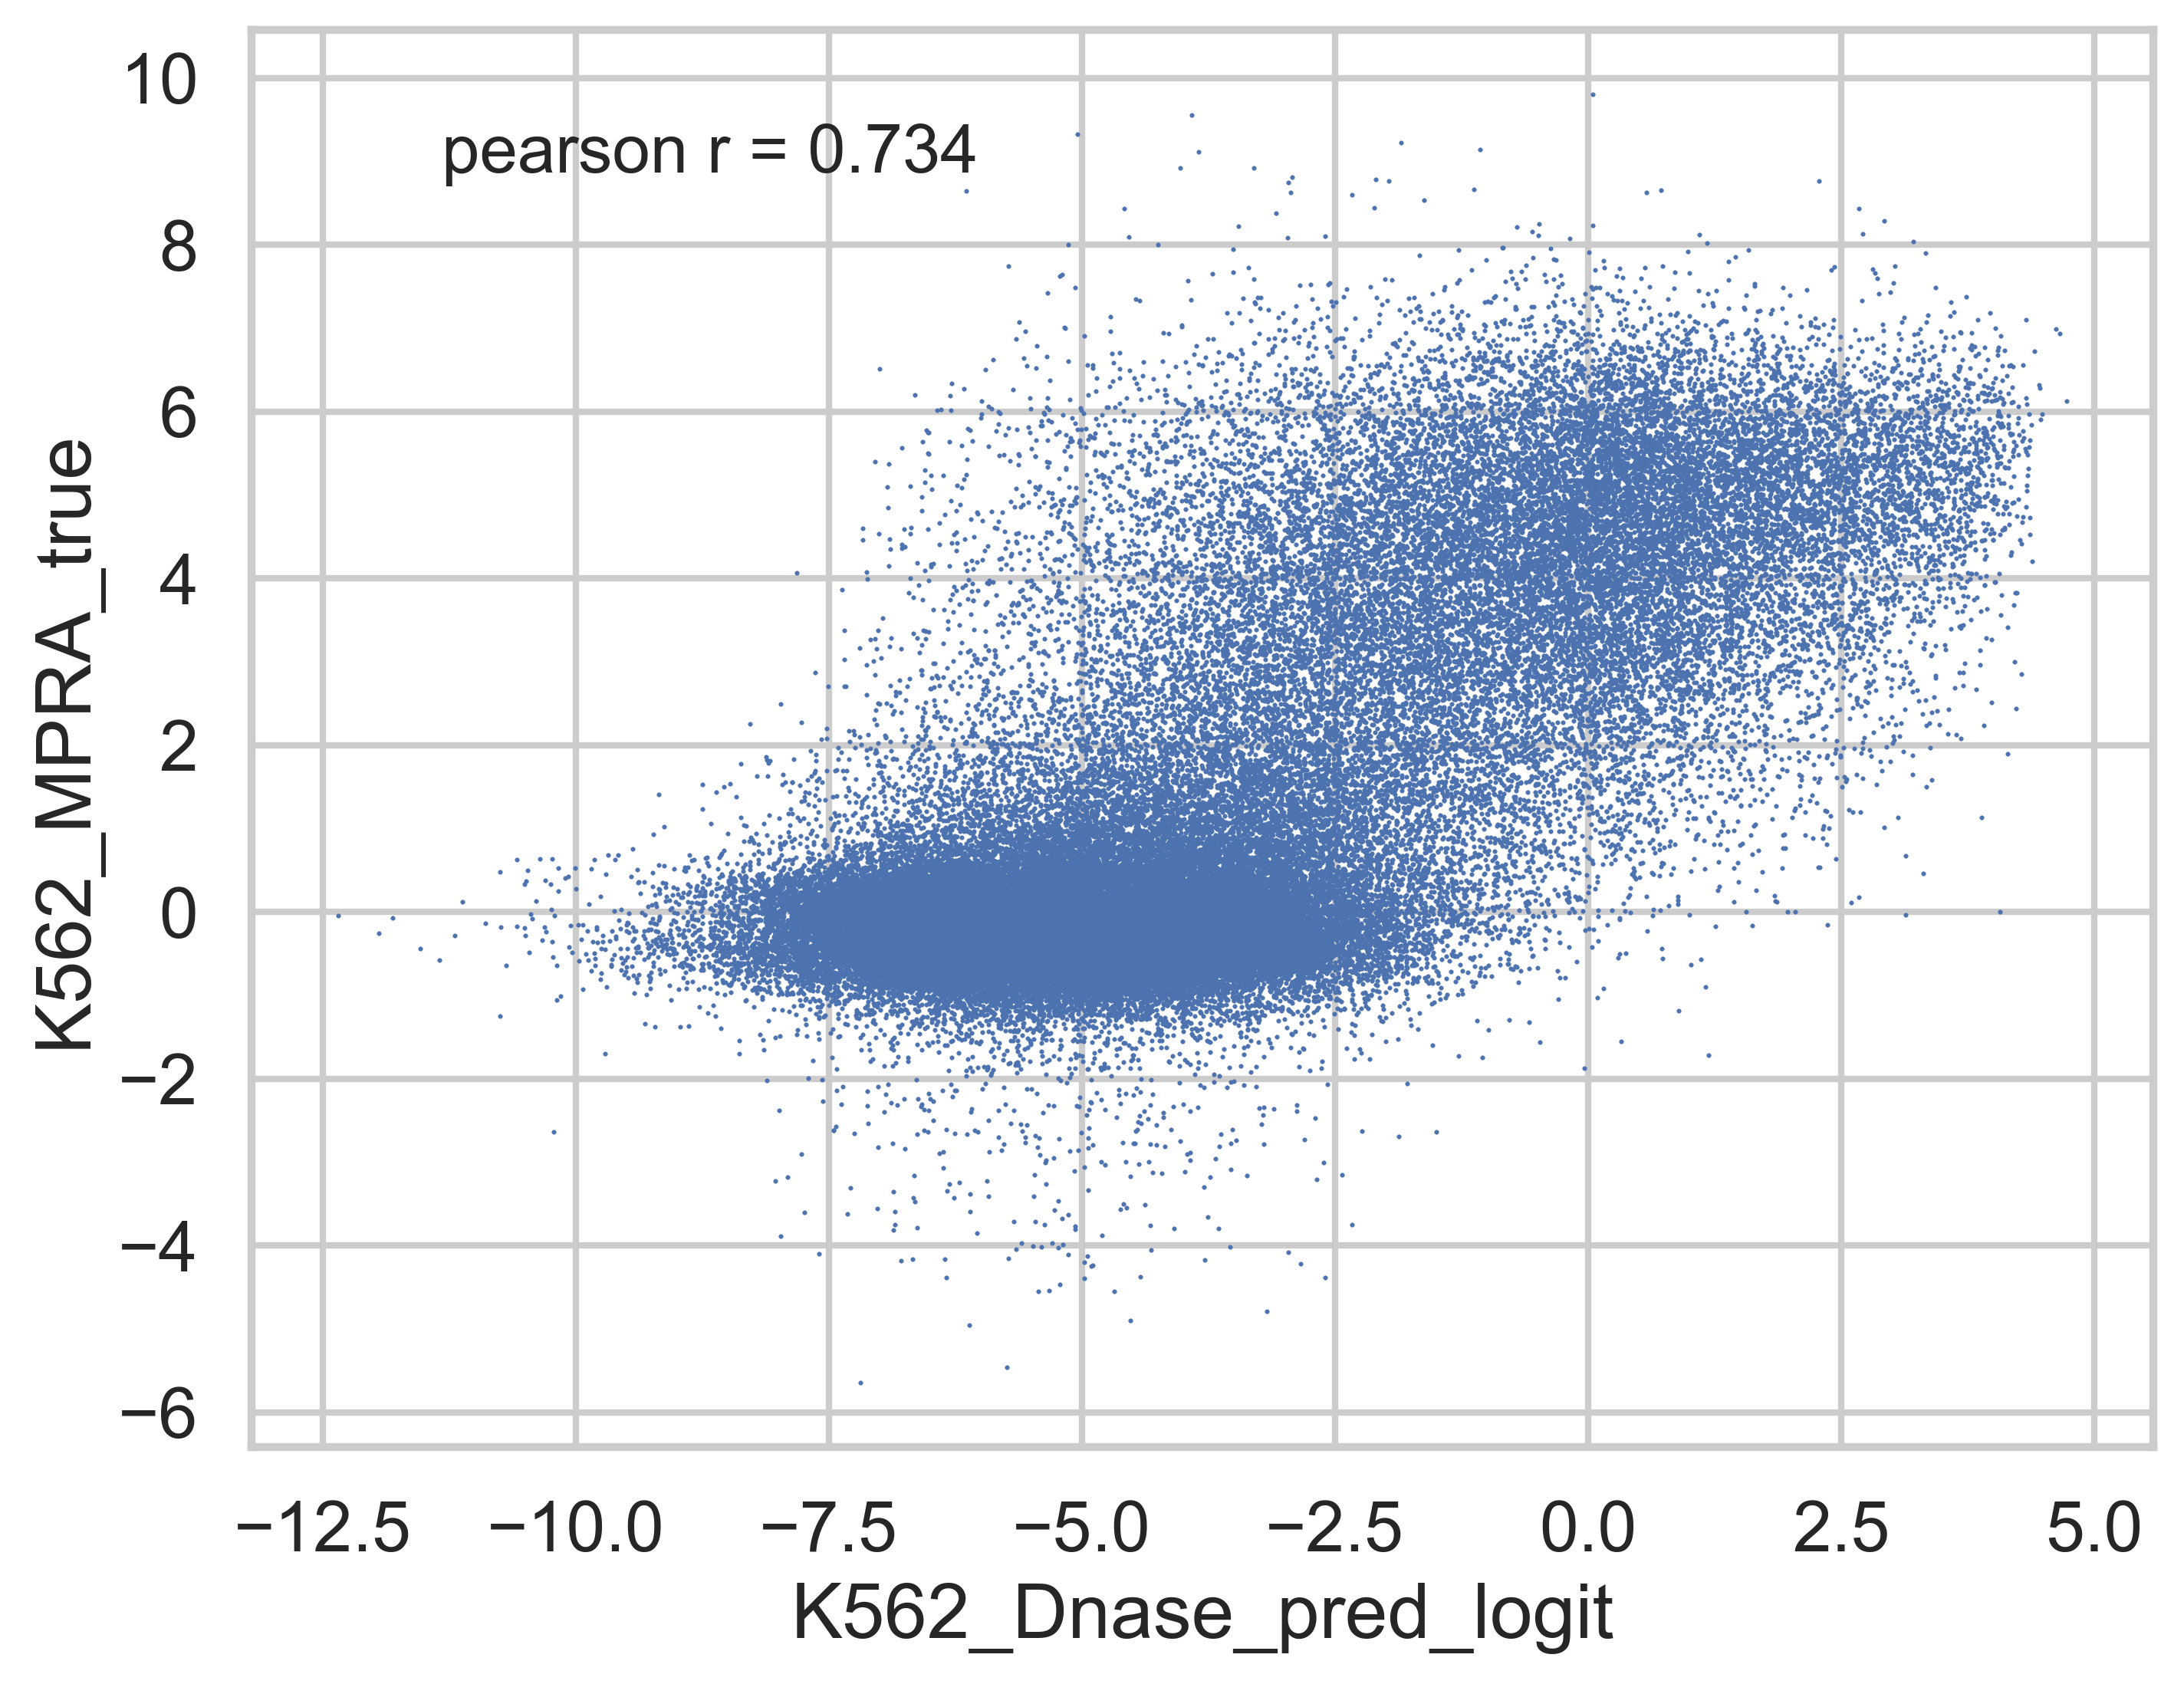

In [17]:
plot_logit(true_df, 'K562', 'Dnase')

pearson r = 0.874


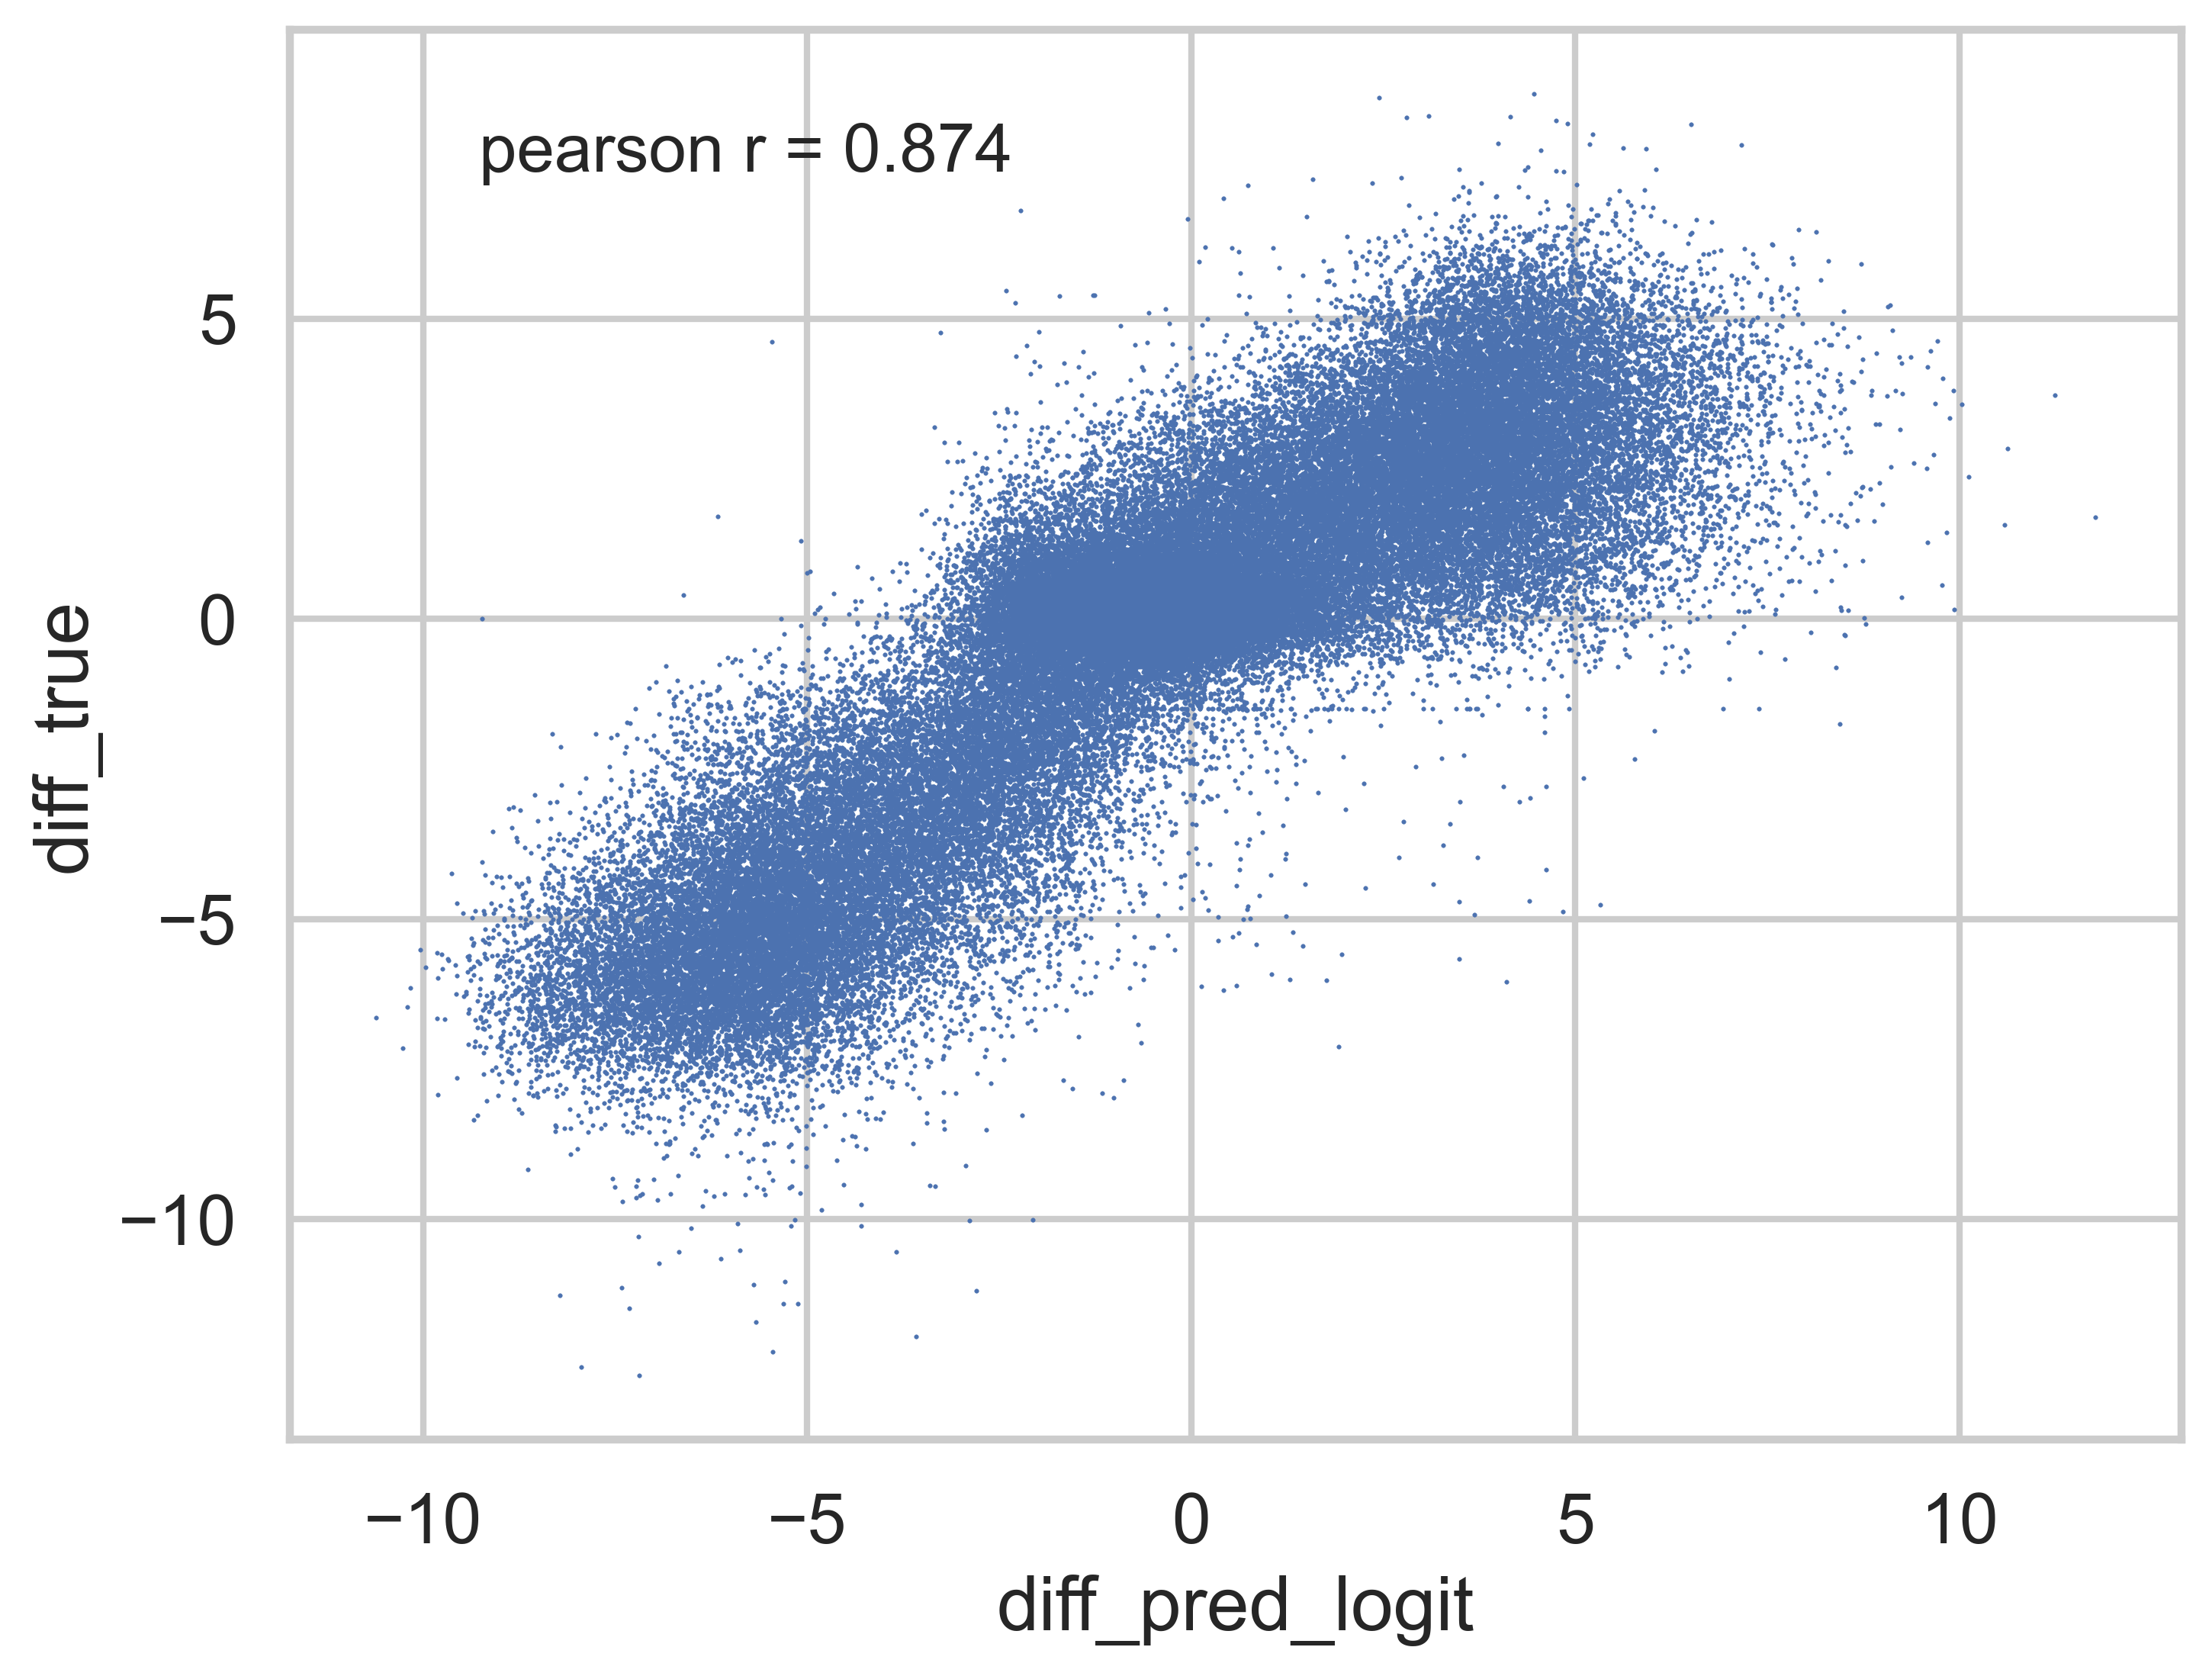

In [175]:
x1 = true_df['HepG2_Dnase_cts_pred']
x1 = np.log(x1/(1-x1))
x2 = true_df['K562_Dnase_cts_pred']
x2 = np.log(x2/(1-x2))
x = x1 - x2

y = true_df['HepG2'] - true_df['K562']

r = pearsonr(x, y)[0]
print(f'pearson r = {r:.3f}')

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y, s=1, edgecolor=None)
plt.xlabel(f'diff_pred_logit')
plt.ylabel(f'diff_true')
plt.text(x=0.1, y=0.9, s=f'pearson r = {r:.3f}', transform=plt.gca().transAxes, fontsize=16)
plt.savefig(f'figures/diff_pred_logit.png', dpi=300, bbox_inches='tight')

pearson r = 0.817


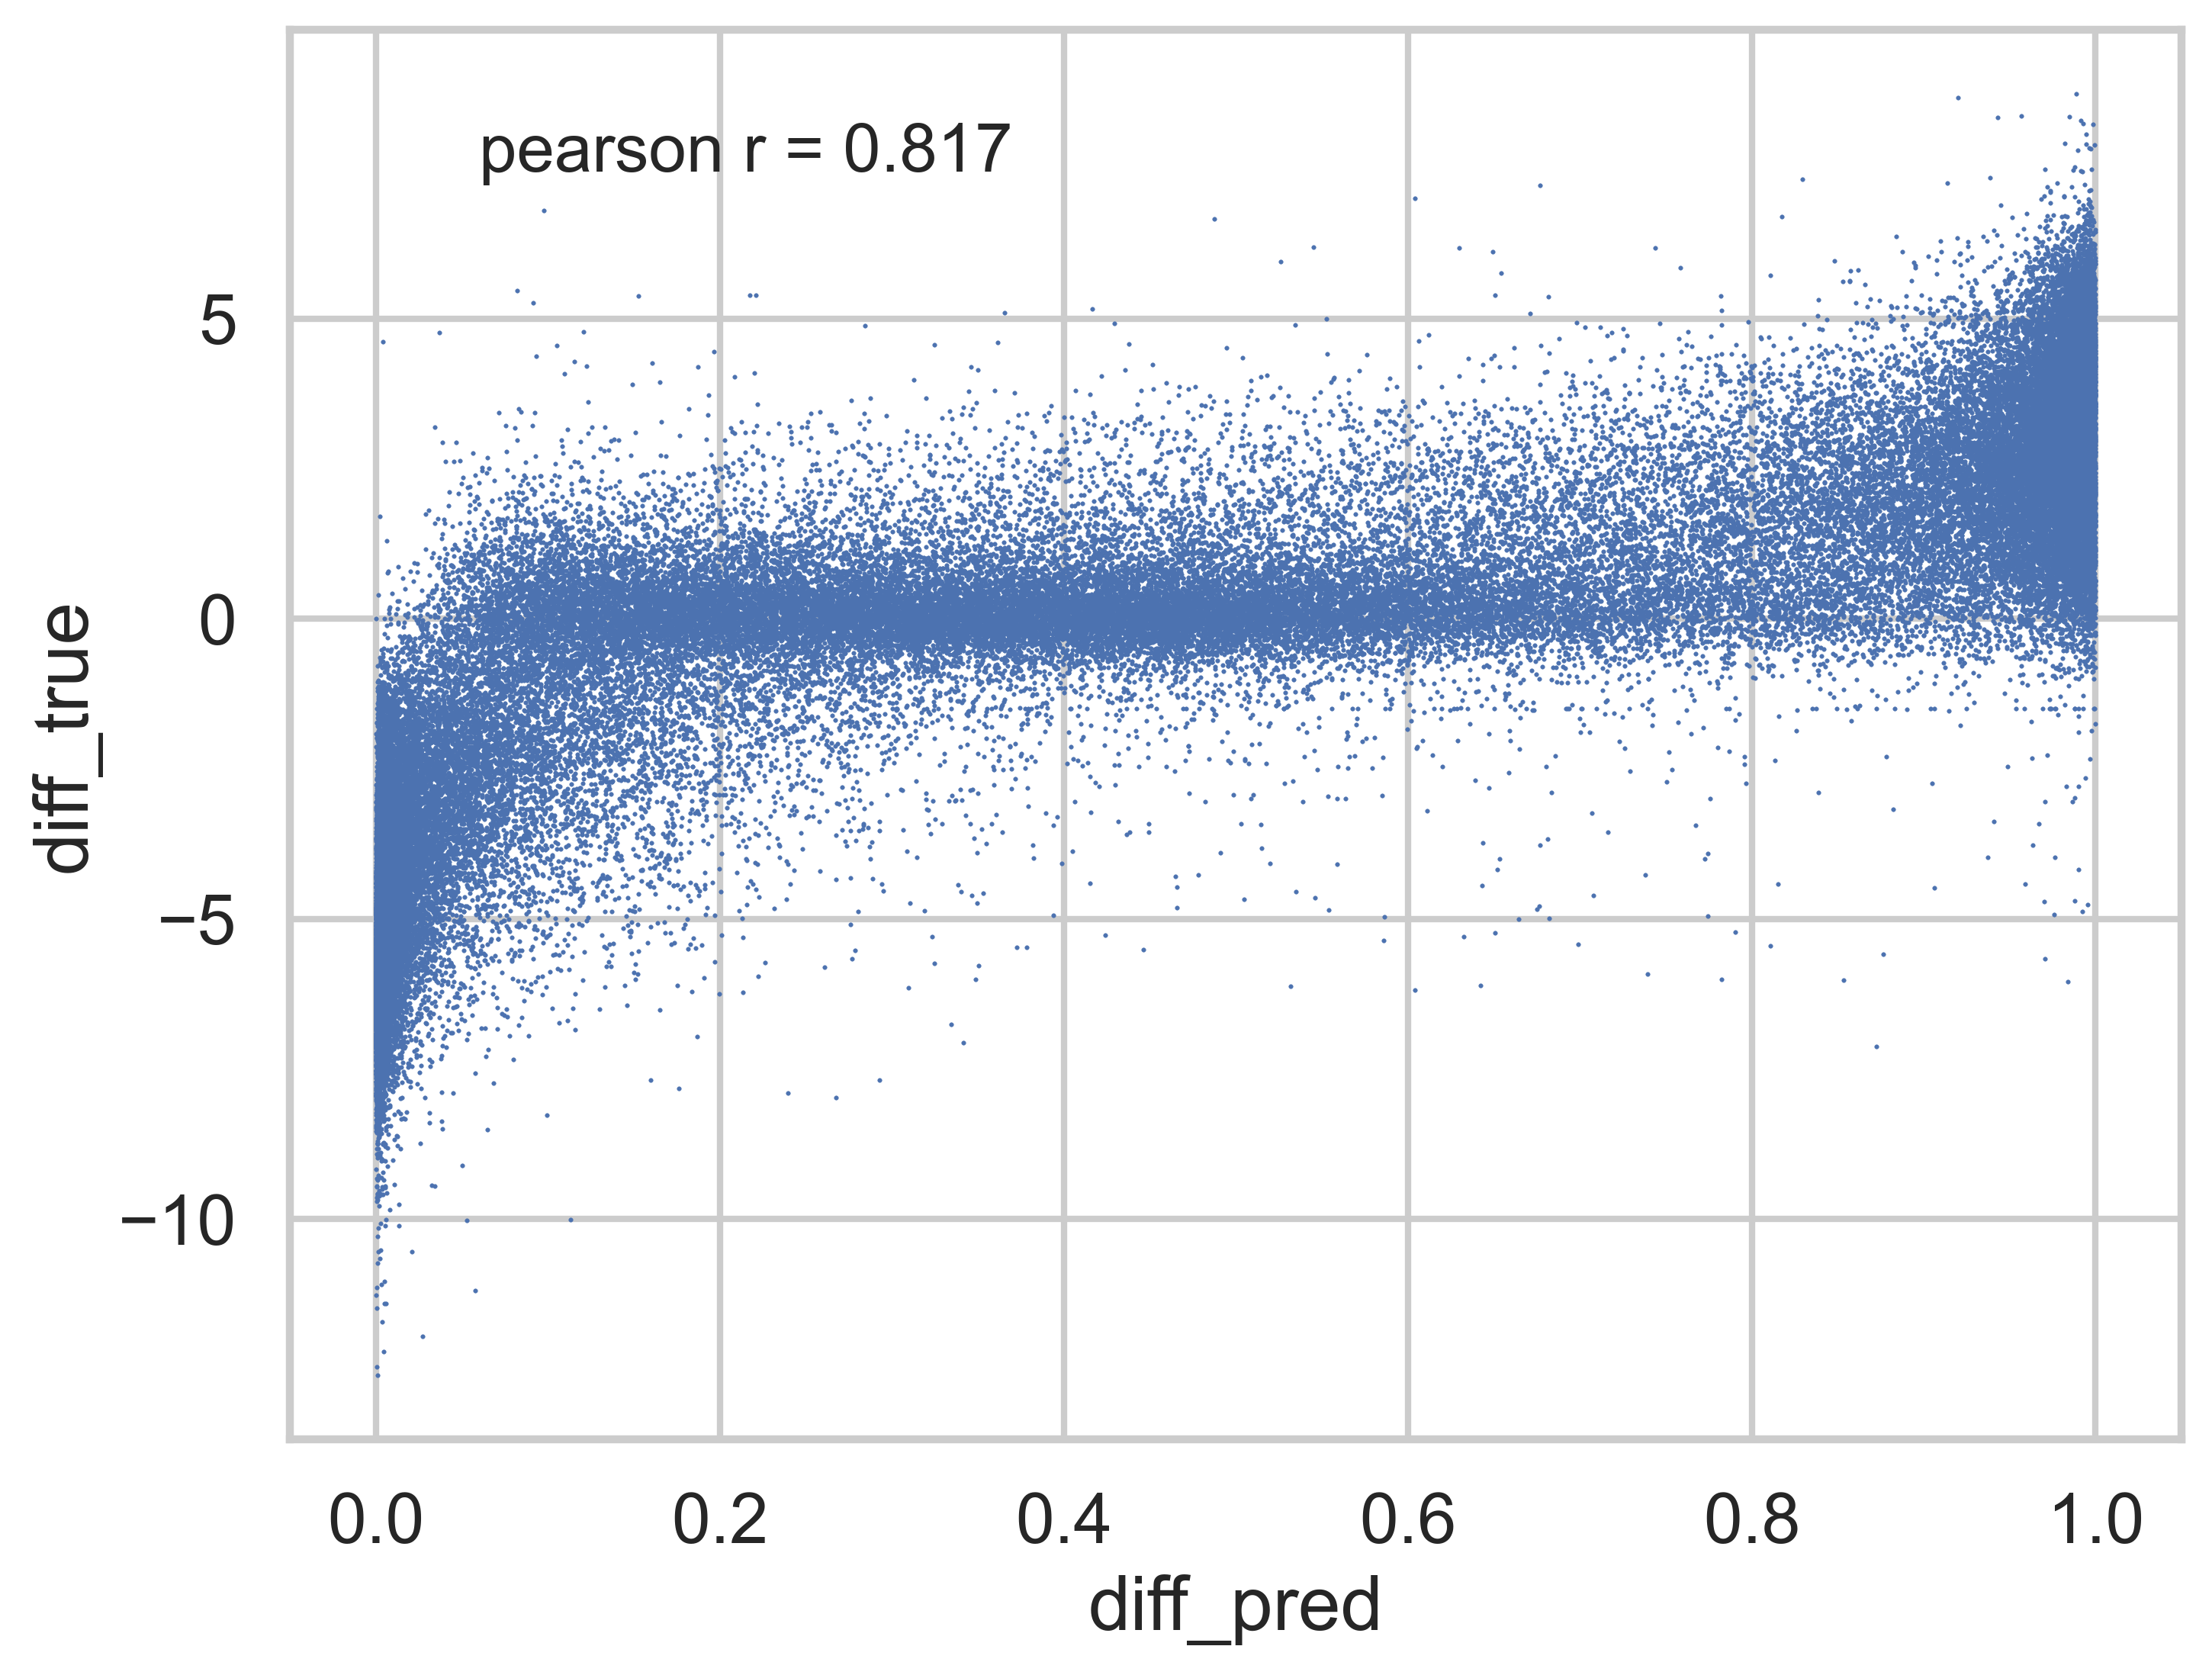

In [174]:
x1 = true_df['HepG2_Dnase_cts_pred']
x1 = np.log(x1/(1-x1))
x2 = true_df['K562_Dnase_cts_pred']
x2 = np.log(x2/(1-x2))
x = x1 - x2
x = 1 / (1 + np.exp(-x))

y = true_df['HepG2'] - true_df['K562']

r = pearsonr(x, y)[0]
print(f'pearson r = {r:.3f}')

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y, s=1, edgecolor=None)
plt.xlabel(f'diff_pred')
plt.ylabel(f'diff_true')
plt.text(x=0.1, y=0.9, s=f'pearson r = {r:.3f}', transform=plt.gca().transAxes, fontsize=16)
plt.savefig(f'figures/diff_pred.png', dpi=300, bbox_inches='tight')